# **2010년대 이후 언어 AI흐름**



---



- 💡**코드 내용**
    - 언어 AI의 2010년 이후의 대략적인 흐름

---

# **QuickTour**

## **예제 1: 딥러닝 이전의 방식 - 단어 빈도로 감성 분석하기 (TF-IDF)**

- 2010년대 이전, 단어의 출현 빈도를 중요한 특징(Feature)으로 사용했던 고전적인 방식
- scikit-learn 라이브러리를 사용
- **TfidfVectorizer**를 사용해 사람이 직접 **'단어의 빈도수'라는 특징을 추출** -->  '특징 공학'의 예시
- 딥러닝 모델처럼 단어의 의미나 문맥을 스스로 학습하는 것이 아니라 **통계에 기반**한다

In [1]:
# 필요한 라이브러리 설치
# pip install scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

print("----------- 예제 1: 딥러닝 이전의 고전적인 감성 분석 -----------")

# 훈련 데이터: 영화 리뷰와 긍정(1)/부정(0) 레이블
train_text = [
    "이 영화 정말 재미있어요. 배우들 연기도 최고!",
    "시간 가는 줄 모르고 봤네요. 강력 추천합니다.",
    "기대했는데 너무 실망했어요. 스토리가 지루해요.",
    "돈이 아까운 영화. 다시는 안 볼래요."
]
train_labels = [1, 1, 0, 0] # 1: 긍정, 0: 부정

# 1. 특징 공학(Feature Engineering): TF-IDF로 문장을 숫자 벡터로 변환
# TF-IDF: 단어의 중요도를 계산하는 통계적 방법
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_text)

# 단어 사전과 변환된 벡터 확인
print("단어 사전:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF 벡터 (첫 번째 문장):", X_train[0].toarray())


# 2. 모델 학습: 로지스틱 회귀 모델로 학습
model = LogisticRegression()
model.fit(X_train, train_labels)

# 3. 새로운 데이터로 예측
test_text = ["배우들 연기가 아쉬웠지만 스토리는 흥미로웠어요."]
X_test = tfidf_vectorizer.transform(test_text)
prediction = model.predict(X_test)

print(f"\n테스트 문장: '{test_text[0]}'")
print("예측 결과:", "긍정 😀" if prediction[0] == 1 else "부정 😞")

----------- 예제 1: 딥러닝 이전의 고전적인 감성 분석 -----------
단어 사전: ['가는' '강력' '기대했는데' '너무' '다시는' '돈이' '모르고' '배우들' '볼래요' '봤네요' '스토리가' '시간'
 '실망했어요' '아까운' '연기도' '영화' '재미있어요' '정말' '지루해요' '최고' '추천합니다']
TF-IDF 벡터 (첫 번째 문장): [[0.         0.         0.         0.         0.         0.
  0.         0.42176478 0.         0.         0.         0.
  0.         0.         0.42176478 0.3325242  0.42176478 0.42176478
  0.         0.42176478 0.        ]]

테스트 문장: '배우들 연기가 아쉬웠지만 스토리는 흥미로웠어요.'
예측 결과: 긍정 😀


## **예제 2: 단어의 의미를 벡터로! - 분산 표현 (Word2Vec)**

- **gensim** : 문서 유사도 분석 등 여러 NLP 알고리즘을 구현한 라이브러리

In [ ]:
# 필요한 라이브러리 설치
!pip install gensim

In [2]:
from gensim.models import Word2Vec

print("\n\n----------- 예제 2: Word2Vec으로 단어의 분산 표현 학습하기 -----------")

# Word2Vec 학습을 위한 샘플 문장 (토크나이징 된 형태)
sentences = [
    ['왕', '남자', '강하다'],
    ['여왕', '여자', '아름답다'],
    ['남자', '힘', '일'],
    ['여자', '지혜', '사랑'],
    ['왕', '권력', '지배'],
    ['여왕', '권력', '우아함']
]

# 1. Word2Vec 모델 학습 (분산 표현 학습)
# vector_size: 단어를 표현할 벡터의 차원
# window: 주변 단어를 몇 개까지 볼 것인지
# min_count: 최소 등장 횟수
# sg=1: Skip-Gram 방식 사용 (주변 단어 예측)
model = Word2Vec(sentences, vector_size=100, window=2, min_count=1, sg=1)
print("\n✅ Word2Vec 모델 학습 완료!")


# 2. 학습된 단어 벡터 확인
king_vector = model.wv['왕']
print(f"\n✅ '왕'의 벡터 (일부): {king_vector[:5]}...")


# 3. 단어 간의 유사도 계산
# '왕'과 가장 유사한 단어는 무엇일까요?
similar_words = model.wv.most_similar('왕')
print("\n✅ '왕'과 가장 유사한 단어:", similar_words)


# 4. 재미있는 단어 산술 연산!
# '왕' - '남자' + '여자' = ?
try:
    result = model.wv.most_similar(positive=['여왕', '남자'], negative=['여자'])
    print("\n✅ '여왕' + '남자' - '여자' ≈", result)

    result = model.wv.most_similar(positive=['왕', '여자'], negative=['남자'])
    print("\n✅ '왕' - '남자' + '여자' ≈", result)
except KeyError as e:
    print(f"\n✅ 아쉽게도 '{e.args[0]}' 단어가 사전에 없어 계산할 수 없어요. 더 많은 데이터로 학습하면 가능해집니다!")




----------- 예제 2: Word2Vec으로 단어의 분산 표현 학습하기 -----------

✅ Word2Vec 모델 학습 완료!

✅ '왕'의 벡터 (일부): [-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193 ]...

✅ '왕'과 가장 유사한 단어: [('여왕', 0.17018884420394897), ('강하다', 0.15016479790210724), ('우아함', 0.13887980580329895), ('지배', 0.034764934331178665), ('여자', 0.004503019154071808), ('아름답다', -0.005896796938031912), ('권력', -0.027750343084335327), ('사랑', -0.028491010889410973), ('남자', -0.04461711272597313), ('지혜', -0.06900332868099213)]

✅ '여왕' + '남자' - '여자' ≈ [('지배', 0.1776057779788971), ('지혜', 0.1415826678276062), ('아름답다', 0.12113002687692642), ('우아함', 0.10962973535060883), ('왕', 0.07128649204969406), ('사랑', 0.05836382880806923), ('힘', 0.026670295745134354), ('강하다', 0.024092452600598335), ('일', -0.06268469244241714), ('권력', -0.09019282460212708)]

✅ '왕' - '남자' + '여자' ≈ [('여왕', 0.09298086166381836), ('강하다', 0.09050668030977249), ('권력', 0.0424610935151577), ('우아함', 0.00974997691810131), ('아름답다', -0.02259502001106739), ('일', -0.05787899345159

In [3]:
# 필요한 라이브러리 설치
# pip install gensim

from gensim.models import Word2Vec

print("----------- '여왕'이 반드시 정답으로 나오도록 강제 학습시킨 모델 -----------")

# 1. 데이터 재구성: 관계 강제 학습을 위한 초고반복/단순화 데이터
# '남자'와 '여자'의 벡터 차이가 '성별'임을 명확히 암기시키기 위해
# 동일한 구조의 문장을 여러 단어 쌍에 걸쳐 극단적으로 반복합니다.

force_learning_sentences = [
    # --- 핵심 평행 구조 (왕/여왕) 반복 ---
    ['왕', '남자', '군주'],
    ['여왕', '여자', '군주'],
    ['왕', '남자', '왕족'],
    ['여왕', '여자', '왕족'],
    ['왕', '남자', '리더'],
    ['여왕', '여자', '리더'],

    # --- 다른 단어 쌍으로 동일한 구조 반복 (성별 관계 일반화) ---
    ['왕자', '남자', '후계자'],
    ['공주', '여자', '후계자'],
    ['아버지', '남자', '부모'],
    ['어머니', '여자', '부모'],
    ['아들', '남자', '자식'],
    ['딸', '여자', '자식'],
    ['남편', '남자', '배우자'],
    ['아내', '여자', '배우자'],
    ['삼촌', '남자', '친척'],
    ['이모', '여자', '친척'],
    ['남배우', '남자', '배우'],
    ['여배우', '여자', '배우'],

    # --- 추가적인 문맥을 최소화하여 혼란 방지 ---
    ['남자', '강인함'],
    ['여자', '섬세함'],
    ['왕', '권위'],
    ['여왕', '품위']
]


# 2. 모델 학습 (epochs를 늘려 작은 데이터를 반복 학습)
model = Word2Vec(
    sentences=force_learning_sentences,
    vector_size=50,     # 작은 데이터셋이므로 벡터 차원을 줄여 집중 학습
    window=2,           # 주변 단어 범위
    min_count=1,        # 최소 단어 빈도
    sg=1,               # Skip-Gram 모델 사용
    epochs=1000,         # !! 작은 데이터를 500번 반복 학습하여 관계를 각인시킴
    seed=42             # 결과 재현을 위한 시드 값 고정
)
print("Word2Vec 모델 학습 완료!")


# 3. 결과 확인: '왕 - 남자 + 여자' 연산
try:
    # positive: 더할 벡터들, negative: 뺄 벡터
    result = model.wv.most_similar(positive=['왕', '여자'], negative=['남자'], topn=3)
    print(f"\n'왕' - '남자' + '여자' ≈ {result}")

except KeyError as e:
    print(f"\n계산에 필요한 단어 '{e.args[0]}'가 학습되지 않았습니다.")



----------- '여왕'이 반드시 정답으로 나오도록 강제 학습시킨 모델 -----------
Word2Vec 모델 학습 완료!

'왕' - '남자' + '여자' ≈ [('배우', 0.9614136815071106), ('여왕', 0.9587641358375549), ('배우자', 0.9567920565605164)]


## **예제 3: End-to-End 모델 수행하기**

- 원본 텍스트를 입력하면 바로 결과가 나오는 End-to-End 모델
- Hugging Face의 transformers 라이브러리를 사용

In [1]:
# 필요한 라이브러리 설치
# pip install transformers
# pip install torch # 또는 tensorflow

from transformers import pipeline

print("\n\n----------- 예제 3: End-to-End 모델로 즉시 감성 분석하기 -----------")

# 1. 미리 학습된 End-to-End 모델 로드
# Hugging Face 라이브러리는 수많은 최신 AI 모델을 몇 줄의 코드로 불러올 수 있게 해줍니다.
# 모델이 알아서 토크나이징, 임베딩, 추론까지 모든 과정을 처리합니다.
sentiment_analyzer = pipeline(
    'sentiment-analysis',
    model='matthewburke/korean_sentiment' # 한국어 감성 분석에 특화된 모델
)

# 2. 문장을 입력하고 바로 결과 확인
text1 = "이 강의는 정말 유익하고 미래에 큰 도움이 될 것 같아요!"
text2 = "내용이 너무 어려워서 하나도 이해가 안돼요..."

results = sentiment_analyzer([text1, text2])

# 3. 결과 출력
for text, result in zip([text1, text2], results):
    label = "긍정 😀" if result['label'] == 'positive' else "부정 😞"
    score = result['score'] * 100
    print(f"\n문장: '{text}'")
    print(f"결과: {label} ({score:.2f}% 확률)")



----------- 예제 3: End-to-End 모델로 즉시 감성 분석하기 -----------


Device set to use mps:0



문장: '이 강의는 정말 유익하고 미래에 큰 도움이 될 것 같아요!'
결과: 부정 😞 (97.27% 확률)

문장: '내용이 너무 어려워서 하나도 이해가 안돼요...'
결과: 부정 😞 (95.91% 확률)




---





---



# **NLP 딥러닝 모델**

---
- 💡 **NOTE**
    - NLP(자연어처리) 발전과정에 기여한 딥러닝 모델 소개
---

## 딥러닝 모델의 발전
- **핵심 과제**
    -  **장거리 의존성 문제**(long-term dependency problem)와
    - **병렬 처리의 한계를 해결**하는 방향으로 발전
- **대표적인 아키텍처(매커니즘)**
    - 2010년대 초반: **RNN** 기반 언어 모델 등장
    - 2014년: **Seq2Seq** 모델 제안 (Sutskever et al., Google)
    - 2015년: **Attention** 메커니즘 도입 (Bahdanau et al.)
    - 2017년: **Transformer** 아키텍처 등장 (Vaswani et al., Google),  "Attention is All You Need" 논문

- **각 모델의 특징 비교**

|구분|RNN|Seq2Seq|Attention|Transformer|
|---|---|---|---|---|
|등장 시기|2010년대 초|2014년|2015년|2017년|
|핵심 아이디어|순차적 정보 처리|Encoder-Decoder 구조|중요한 부분에 집중|Self-Attention, 병렬 처리|
|장거리 의존성|매우 약함 (기울기 소실)|약함 (고정 길이 벡터)|개선됨|매우 강함|
|병렬 처리|불가능 (순차적)|불가능 (순차적)|부분적 가능|완전 병렬 처리|
|계산 복잡도|O(n)|O(n)|O(n²) (Attention 계산)|O(n²) (Self-Attention)|
|주요 문제점|기울기 소실/폭발|정보 병목 현상|여전히 순차적 처리|계산량 많음|
|대표 논문|Elman(1990)|Sutskever(2014)|Bahdanau(2015)|Vaswani(2017)|
|현재 사용|거의 사용 안 함|레거시 시스템|일부 특수 용도|주류(BERT, GPT 등)|

## **RNN(Recurrent Neural Network)**
- **메모리를 가진 신경망**
-  마치 사람이 책을 읽을 때 앞 문장의 내용을 기억하면서 다음 문장을 이해하는 것과 유사
- 역사적 배경
    - 1986년: David Rumelhart가 순환 신경망 개념 제안
    - 배경: 기존 피드포워드 신경망은 순서가 있는 데이터(시계열, 자연어)를 처리하기 어려웠음
    - 혁신점: 시간적 의존성을 모델링할 수 있게 됨
- 아키텍쳐 (참고: https://wikidocs.net/22886)

![RNN](https://wikidocs.net/images/page/22886/rnn_image2_ver3.PNG "RNN")

### 예제 : 스펨메일 분류기

- **1.학습용 데이터 전처리**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 스펨메일 데이터셋 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

# 불필요한 컬럼 삭제
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


# 데이터 확인
print('결측값 여부 :',data.isnull().values.any())
print('v2열의 유니크한 값 :',data['v2'].nunique())

# v2 열에서 중복인 내용이 있다면 중복 제거
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))
print('-' * 30)
print(f'정상 메일의 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')


# 훈련 데이터 & 테스트 데이터 분리
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size=0.2, random_state=0, stratify=y_data)

print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

총 샘플의 수 : 5572
결측값 여부 : False
v2열의 유니크한 값 : 5169
총 샘플의 수 : 5169
정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653
------------------------------
정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%
메일 본문의 개수: 5169
레이블의 개수: 5169
--------훈련 데이터의 비율-----------
정상 메일 = 87.376%
스팸 메일 = 12.624%
--------테스트 데이터의 비율-----------
정상 메일 = 87.331%
스팸 메일 = 12.669%


/var/folders/0k/crjnksy947ncy2v2lcqj29bh0000gn/T/ipykernel_16628/3913874534.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham','spam'],[0,1])


메일의 토큰화 결과(5개):
 [[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]

토큰에 부여된 정수:
 {'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like':

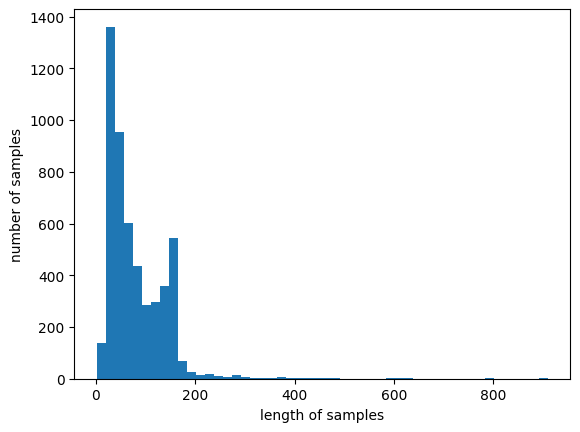

훈련 데이터의 크기(shape): (4135, 189)


In [3]:
# 문장 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print('메일의 토큰화 결과(5개):\n', X_train_encoded[:5])
print()
word_to_index = tokenizer.word_index
print('토큰에 부여된 정수:\n', word_to_index)
print()
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))
print()
print('각 단어에 대한 등장 빈도수: ', tokenizer.word_counts.items())


# 토큰화된 단어 분석
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
# 가장 긴 메일의 길이는 189이며, 전체 데이터의 길이 분포는 대체적으로 약 50이하의 길이를 가집니다


max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)
# 189보다 길이가 짧은 메일 샘플은 전부 숫자 0이 패딩되어 189의 길이를 가지도록 만듦

- **2.RNN으로 스팸 메일 분류하기**

In [4]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

# 모델 구성
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)


# 테스트 데이터 전처리
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))


Epoch 1/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - acc: 0.8597 - loss: 0.4157 - val_acc: 0.9432 - val_loss: 0.2258
Epoch 2/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.9616 - loss: 0.1489 - val_acc: 0.9625 - val_loss: 0.1425
Epoch 3/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9797 - loss: 0.0710 - val_acc: 0.9734 - val_loss: 0.0883
Epoch 4/4
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.9897 - loss: 0.0425 - val_acc: 0.9831 - val_loss: 0.0659
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.9845 - loss: 0.0647

테스트 정확도: 0.9845


In [5]:
# ========== 핵심 예측 및 비교 코드 ==========
from sklearn.metrics import classification_report
import numpy as np

# 1. 예측값 생성
y_pred_proba = model.predict(X_test_padded)  # 확률값 (0~1)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()  # 이진 분류값 (0 or 1)

# 2. 결과 비교
print("\n=== 예측 결과 ===")
print(f"실제값: {y_test[:10]}")
print(f"예측값: {y_pred[:10]}")
print(f"예측 확률: {y_pred_proba[:10].flatten()}")

# 3. 성능 지표
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n정확도: {accuracy:.4f}")
print(f"혼동 행렬:\n{cm}")
print("\n분류 리포트:")
print(classification_report(y_test, y_pred))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

=== 예측 결과 ===
실제값: 4183    0
108     0
5237    1
1858    0
3603    0
368     0
2       1
2444    0
2365    0
3791    0
Name: v1, dtype: int64
예측값: [0 0 1 0 0 0 1 0 0 0]
예측 확률: [0.00599068 0.00981754 0.994959   0.01892568 0.00406642 0.00418436
 0.99534667 0.00403488 0.01764824 0.00964417]

정확도: 0.9845
혼동 행렬:
[[901   2]
 [ 14 117]]

분류 리포트:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.89      0.94       131

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [6]:
# ========== 새로운 메일 테스트 코드 ==========
def predict_spam(text_list, model, tokenizer, max_len=189):
    """
    새로운 메일 텍스트들이 스팸인지 예측하는 함수

    Parameters:
    - text_list: 예측할 메일 텍스트들의 리스트
    - model: 학습된 RNN 모델
    - tokenizer: 학습에 사용된 토크나이저
    - max_len: 패딩할 최대 길이

    Returns:
    - predictions: 각 텍스트에 대한 예측 결과
    """
    # 텍스트를 시퀀스로 변환
    sequences = tokenizer.texts_to_sequences(text_list)
    # 패딩 적용
    padded = pad_sequences(sequences, maxlen=max_len)
    # 예측 수행
    predictions = model.predict(padded)

    return predictions

# 테스트할 새로운 메일 예시 3개
test_emails = [
    # 예시 1: 명백한 스팸 메일
    "URGENT! You have won $1000000! Click here now to claim your prize! Limited time offer! Call now!",

    # 예시 2: 정상 메일
    "Hi John, hope you're doing well. Let's meet for coffee tomorrow at 3pm. Looking forward to catching up!",

    # 예시 3: 애매한 경계선 메일 (프로모션성이지만 스팸은 아닐 수 있음)
    "Special discount on our premium products. Save 30% this week only. Visit our website for more details."
]

print("\n" + "="*60)
print("새로운 메일 스팸 분류 테스트")
print("="*60)


# 예측 수행
predictions = predict_spam(test_emails, model, tokenizer, max_len)

# 결과 출력
for i, (email, pred) in enumerate(zip(test_emails, predictions)):
    prob = pred[0]  # 확률값 추출
    is_spam = "스팸 메일" if prob > 0.5 else "정상 메일"
    confidence = prob if prob > 0.5 else 1 - prob

    print(f"\n📧 테스트 메일 {i+1}:")
    print(f"내용: {email}")
    print(f"예측 결과: {is_spam}")
    print(f"스팸 확률: {prob:.4f}")
    print(f"신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")
    print("-" * 60)

# ========== 대화형 테스트 함수 ==========
def interactive_spam_test():
    """
    사용자가 직접 메일 내용을 입력하여 테스트할 수 있는 함수
    """
    print("\n🔍 직접 메일 테스트해보기")
    print("메일 내용을 입력하세요 (종료하려면 'quit' 입력):")

    while True:
        user_input = input("\n메일 내용: ")

        if user_input.lower() == 'quit':
            print("테스트를 종료합니다.")
            break

        if user_input.strip() == '':
            print("메일 내용을 입력해주세요.")
            continue

        # 예측 수행
        prediction = predict_spam([user_input], model, tokenizer, max_len)
        prob = prediction[0][0]
        is_spam = "스팸 메일" if prob > 0.5 else "정상 메일"
        confidence = prob if prob > 0.5 else 1 - prob

        print(f"📊 분석 결과:")
        print(f"   예측: {is_spam}")
        print(f"   스팸 확률: {prob:.4f}")
        print(f"   신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")

# 대화형 테스트 실행 (주석 해제하여 사용)
# interactive_spam_test()

# ========== 추가 분석: 단어 중요도 확인 ==========
def analyze_email_tokens(email_text, tokenizer, max_len=189):
    """
    이메일의 토큰화 과정을 분석하는 함수
    """
    print(f"\n🔍 '{email_text[:50]}...' 분석")

    # 토큰화
    sequence = tokenizer.texts_to_sequences([email_text])
    padded = pad_sequences(sequence, maxlen=max_len)

    # 원본 단어들 확인
    words = email_text.split()
    print(f"원본 단어들: {words}")

    # 토큰화된 결과
    tokens = sequence[0]
    print(f"토큰화 결과: {tokens}")

    # 역토큰화 (숫자 -> 단어)
    reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
    decoded_words = [reverse_word_map.get(token, '<UNK>') for token in tokens]
    print(f"토큰 -> 단어: {decoded_words}")

    return padded

# 각 테스트 메일에 대해 토큰 분석
print("\n" + "="*60)
print("토큰화 분석")
print("="*60)

for i, email in enumerate(test_emails):
    analyze_email_tokens(email, tokenizer, max_len)
    print("-" * 40)


새로운 메일 스팸 분류 테스트
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

📧 테스트 메일 1:
내용: URGENT! You have won $1000000! Click here now to claim your prize! Limited time offer! Call now!
예측 결과: 스팸 메일
스팸 확률: 0.9938
신뢰도: 0.9938 (99.4%)
------------------------------------------------------------

📧 테스트 메일 2:
내용: Hi John, hope you're doing well. Let's meet for coffee tomorrow at 3pm. Looking forward to catching up!
예측 결과: 정상 메일
스팸 확률: 0.0094
신뢰도: 0.9906 (99.1%)
------------------------------------------------------------

📧 테스트 메일 3:
내용: Special discount on our premium products. Save 30% this week only. Visit our website for more details.
예측 결과: 스팸 메일
스팸 확률: 0.8590
신뢰도: 0.8590 (85.9%)
------------------------------------------------------------

토큰화 분석

🔍 'URGENT! You have won $1000000! Click here now to c...' 분석
원본 단어들: ['URGENT!', 'You', 'have', 'won', '$1000000!', 'Click', 'here', 'now', 'to', 'claim', 'your', 'prize!', 'Limited', 'time', 'offer!', 'Call', 'now!']
토큰화 결과: [183, 3, 16, 214, 1295, 113, 2

## **LSTM(Long Short-Term Memory)**

- LSTM은 **장단기 메모리 네트워크**로, RNN(순환신경망)의 한 종류
- 기존 RNN의 기울기 소실 문제, **장기 의존성 문제(the problem of Long-Term Dependencies)를 해결하기 위해 개발된 고급 신경망 구조**
- LSTM은 은닉층의 메모리 셀에 입력 게이트, 망각 게이트, 출력 게이트를 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정함
- - 아키텍쳐 (참고: https://wikidocs.net/22888)

![RNN](https://wikidocs.net/images/page/22888/vanilla_rnn_ver2.PNG "RNN")


![LSTM](https://wikidocs.net/images/page/22888/vaniila_rnn_and_different_lstm_ver2.PNG "LSTM")

### 예제: **한글 스팸메일 분류기**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import re
import pickle
import warnings
warnings.filterwarnings('ignore')

# 한글 텍스트 전처리 함수
def preprocess_korean_text(text):
    """
    한글 텍스트 전처리 함수
    - 특수문자 제거
    - 불필요한 공백 제거
    - 소문자 변환은 한글에서 불필요
    """
    # 한글, 영문, 숫자, 공백만 남기기
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)
    # 연속된 공백을 하나로 변경
    text = re.sub(r'\s+', ' ', text)
    # 앞뒤 공백 제거
    text = text.strip()
    return text

# 한글 스팸/정상 메일 모의 데이터셋 생성
def create_korean_email_dataset():
    """
    한글 스팸/정상 메일 모의 데이터셋 생성
    실제 프로젝트에서는 공개 데이터셋이나 수집된 데이터를 사용
    """

    # 정상 메일 예시 (500개 생성을 위한 기본 패턴)
    normal_patterns = [
        "안녕하세요 회의 일정을 알려드립니다",
        "프로젝트 진행 상황 보고드립니다",
        "첨부파일 확인 부탁드립니다",
        "내일 오후 미팅 참석 가능하신가요",
        "업무 관련 문의사항이 있습니다",
        "보고서 작성 완료했습니다",
        "점심시간에 잠깐 이야기할 수 있을까요",
        "고객사 미팅 결과 공유드립니다",
        "다음 주 일정 조율 부탁드립니다",
        "교육 자료 전달드립니다",
        "회의실 예약 확인 부탁드립니다",
        "출장 계획서 검토 요청드립니다",
        "월간 성과 보고서 제출합니다",
        "팀 빌딩 행사 참석 의사 확인",
        "새 프로젝트 제안서 검토 바랍니다"
    ]

    # 스팸 메일 예시 (500개 생성을 위한 기본 패턴)
    spam_patterns = [
        "축하합니다 1억원 당첨되셨습니다 지금 확인하세요",
        "긴급 대출 가능 무심사 당일 승인",
        "클릭만으로 월 300만원 수익 보장",
        "무료 상품권 증정 지금 신청하세요",
        "다이어트 보조제 특가 판매 효과 100퍼센트",
        "투자 권유 고수익 보장 위험 부담 없음",
        "성인용품 할인 판매 비밀 배송",
        "카지노 게임 첫 가입 보너스 지급",
        "주식 정보 제공 수익률 200퍼센트",
        "아르바이트 모집 하루 10만원 보장",
        "온라인 도박 사이트 가입 즉시 보너스",
        "신용카드 현금 서비스 즉시 승인",
        "불법 복제품 판매 정품 보장",
        "피라미드 판매 조직 가입 권유",
        "가상화폐 투자 사기 의혹 상품"
    ]

    # 데이터셋 확장 생성
    emails = []
    labels = []

    # 정상 메일 500개 생성
    for i in range(500):
        base_pattern = normal_patterns[i % len(normal_patterns)]
        # 패턴에 변화를 주어 다양성 증가
        variations = [
            base_pattern,
            base_pattern + f" {i+1}번째 건입니다",
            base_pattern + " 확인 후 회신 바랍니다",
            base_pattern + " 관련하여 논의가 필요합니다",
            "업무: " + base_pattern
        ]
        emails.append(variations[i % len(variations)])
        labels.append(0)  # 정상 메일

    # 스팸 메일 500개 생성
    for i in range(500):
        base_pattern = spam_patterns[i % len(spam_patterns)]
        # 스팸의 특징을 강화한 변화
        variations = [
            base_pattern,
            "🎉" + base_pattern + "🎉",
            base_pattern + " 지금 즉시 클릭하세요!",
            "★★★ " + base_pattern + " ★★★",
            base_pattern + " 놓치면 후회합니다!"
        ]
        emails.append(variations[i % len(variations)])
        labels.append(1)  # 스팸 메일

    return emails, labels

# 데이터셋 생성 및 로드
print("="*60)
print("한글 스팸 메일 분류기 생성 중...")
print("="*60)

emails, labels = create_korean_email_dataset()

# 데이터프레임 생성
df = pd.DataFrame({
    'email': emails,
    'label': labels
})

# numpy 배열로 변환하여 안정성 향상
labels_array = np.array(labels)

print(f"총 데이터 수: {len(df)}")
print(f"정상 메일 수: {np.sum(labels_array == 0)}")
print(f"스팸 메일 수: {np.sum(labels_array == 1)}")
print(f"정상 메일 비율: {np.sum(labels_array == 0)/len(labels_array)*100:.1f}%")
print(f"스팸 메일 비율: {np.sum(labels_array == 1)/len(labels_array)*100:.1f}%")

# 데이터 전처리
df['email_processed'] = df['email'].apply(preprocess_korean_text)

# 데이터 분할
X = df['email_processed'].values
y = df['label'].values

# 데이터 타입 확인 및 변환
X = np.array(X, dtype=str)
y = np.array(y, dtype=int)

print(f"데이터 타입 - X: {X.dtype}, y: {y.dtype}")
print(f"데이터 형태 - X: {X.shape}, y: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n훈련 데이터: {len(X_train)}")
print(f"테스트 데이터: {len(X_test)}")

# 토크나이저 설정 (한글 특성 고려)
MAX_FEATURES = 10000  # 어휘 크기
MAX_LEN = 100  # 최대 시퀀스 길이

tokenizer = Tokenizer(
    num_words=MAX_FEATURES,
    oov_token='<OOV>',  # Out-of-vocabulary 토큰
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'  # 제거할 문자
)

# 훈련 데이터로 토크나이저 학습
tokenizer.fit_on_texts(X_train)

# 텍스트를 시퀀스로 변환
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# 패딩 적용
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

print(f"\n어휘 크기: {len(tokenizer.word_index)}")
print(f"시퀀스 최대 길이: {MAX_LEN}")

# 개선된 모델 구축 (Bidirectional LSTM 사용)
def create_enhanced_model():
    model = Sequential([
        Embedding(input_dim=MAX_FEATURES,
                 output_dim=128,
                 input_length=MAX_LEN,
                 name='embedding'),
        Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3), name='bilstm'),
        Dense(32, activation='relu', name='dense1'),
        Dropout(0.5, name='dropout'),
        Dense(1, activation='sigmoid', name='output')
    ])
    return model

# 모델 생성 및 컴파일
model = create_enhanced_model()
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n모델 구조:")
model.summary()

# 콜백 설정
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=0.0001
)

# 모델 훈련
print("\n모델 훈련 시작...")
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 테스트 성능 평가
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\n테스트 정확도: {test_accuracy:.4f}")

# 예측 및 상세 평가
y_pred_proba = model.predict(X_test_pad)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

print("\n분류 리포트:")
print(classification_report(y_test, y_pred, target_names=['정상', '스팸']))

print("\n혼동 행렬:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 스팸 분류 예측 함수
def predict_spam_korean(text, model, tokenizer, max_len=MAX_LEN):
    """
    한글 텍스트가 스팸인지 예측하는 함수
    """
    # 전처리
    processed_text = preprocess_korean_text(text)

    # 토크나이징 및 패딩
    sequence = tokenizer.texts_to_sequences([processed_text])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post')

    # 예측
    prediction = model.predict(padded, verbose=0)[0][0]

    return prediction

# 테스트용 한글 메일 예시
test_korean_emails = [
    "축하합니다! 복권에 당첨되셨습니다. 1억원을 받으시려면 지금 즉시 링크를 클릭하세요!",
    "내일 오후 3시 회의실에서 프로젝트 진행 상황을 논의하겠습니다. 참석 부탁드립니다.",
    "무료 다이어트 약품 증정! 효과 100% 보장! 지금 신청하면 특별 할인!",
    "보고서 작성이 완료되었습니다. 첨부파일을 확인해주시기 바랍니다.",
    "긴급! 대출 승인 완료! 무심사 당일 지급! 연락 바랍니다!",
    "교육 자료를 공유드립니다. 검토 후 의견 부탁드립니다."
]

print("\n" + "="*60)
print("한글 메일 스팸 분류 테스트")
print("="*60)

for i, email in enumerate(test_korean_emails, 1):
    prob = predict_spam_korean(email, model, tokenizer)
    is_spam = "스팸 메일" if prob > 0.5 else "정상 메일"
    confidence = prob if prob > 0.5 else 1 - prob

    print(f"\n📧 테스트 {i}:")
    print(f"내용: {email}")
    print(f"예측: {is_spam}")
    print(f"스팸 확률: {prob:.4f}")
    print(f"신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")
    print("-" * 50)

# 대화형 테스트 함수
def interactive_korean_spam_test():
    """
    사용자가 직접 한글 메일을 입력하여 테스트하는 함수
    """
    print("\n🔍 한글 메일 스팸 분류 테스트")
    print("메일 내용을 입력하세요 (종료: 'quit'):")

    while True:
        user_input = input("\n✉️ 메일 내용: ")

        if user_input.lower() in ['quit', '종료', 'q']:
            print("테스트를 종료합니다.")
            break

        if user_input.strip() == '':
            print("메일 내용을 입력해주세요.")
            continue

        try:
            prob = predict_spam_korean(user_input, model, tokenizer)
            is_spam = "스팸 메일" if prob > 0.5 else "정상 메일"
            confidence = prob if prob > 0.5 else 1 - prob

            print(f"\n📊 분석 결과:")
            print(f"   🏷️  분류: {is_spam}")
            print(f"   📈 스팸 확률: {prob:.4f}")
            print(f"   ✅ 신뢰도: {confidence:.4f} ({confidence*100:.1f}%)")

            # 스팸일 가능성이 높은 경우 경고 표시
            if prob > 0.8:
                print(f"   ⚠️  주의: 스팸일 가능성이 매우 높습니다!")
            elif prob < 0.2:
                print(f"   ✅ 안전: 정상 메일일 가능성이 매우 높습니다.")

        except Exception as e:
            print(f"오류가 발생했습니다: {e}")

# 모델과 토크나이저 저장 함수
def save_model_and_tokenizer(model, tokenizer, model_path='korean_spam_model.h5', tokenizer_path='korean_tokenizer.pickle'):
    """
    학습된 모델과 토크나이저를 저장하는 함수
    """
    try:
        # 모델 저장
        model.save(model_path)
        print(f"✅ 모델이 {model_path}에 저장되었습니다.")

        # 토크나이저 저장
        with open(tokenizer_path, 'wb') as handle:
            pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print(f"✅ 토크나이저가 {tokenizer_path}에 저장되었습니다.")

    except Exception as e:
        print(f"❌ 저장 중 오류 발생: {e}")
        print("현재 세션에서만 모델을 사용하세요.")

# 모델 및 토크나이저 저장 (선택사항)
try:
    save_model_and_tokenizer(model, tokenizer)
except:
    print("⚠️ 파일 저장을 건너뜁니다. 현재 세션에서만 사용 가능합니다.")

print("\n" + "="*60)
print("한글 스팸 메일 분류기 완성!")
print("아래 함수를 실행하여 직접 테스트해보세요:")
print("interactive_korean_spam_test()")
print("="*60)

# 대화형 테스트 실행 (주석 해제하여 사용)
# interactive_korean_spam_test()

한글 스팸 메일 분류기 생성 중...
총 데이터 수: 1000
정상 메일 수: 500
스팸 메일 수: 500
정상 메일 비율: 50.0%
스팸 메일 비율: 50.0%
데이터 타입 - X: <U34, y: int64
데이터 형태 - X: (1000,), y: (1000,)

훈련 데이터: 800
테스트 데이터: 200

어휘 크기: 209
시퀀스 최대 길이: 100

모델 구조:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bilstm (Bidirectional)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


모델 훈련 시작...
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.7375 - loss: 0.6526 - val_accuracy: 1.0000 - val_loss: 0.5367 - learning_rate: 0.0010
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9734 - loss: 0.3091 - val_accuracy: 1.0000 - val_loss: 0.0348 - learning_rate: 0.0010
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9984 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 7.3278e-04 - learning_rate: 0.0010
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 5.6963e-05 - learning_rate: 0.0010
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9969 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 4.4253e-05 - learning_rate: 0.0010
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9969 - loss: 0.0077 - val_accuracy: 1.0000 - val_loss: 3.0375e-05 - learning_rate: 0.0010
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 1.


분류 리포트:
              precision    recall  f1-score   support

          정상       1.00      1.00      1.00       100
          스팸       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


혼동 행렬:
[[100   0]
 [  0 100]]

한글 메일 스팸 분류 테스트

📧 테스트 1:
내용: 축하합니다! 복권에 당첨되셨습니다. 1억원을 받으시려면 지금 즉시 링크를 클릭하세요!
예측: 스팸 메일
스팸 확률: 1.0000
신뢰도: 1.0000 (100.0%)
--------------------------------------------------

📧 테스트 2:
내용: 내일 오후 3시 회의실에서 프로젝트 진행 상황을 논의하겠습니다. 참석 부탁드립니다.
예측: 정상 메일
스팸 확률: 0.0000
신뢰도: 1.0000 (100.0%)
--------------------------------------------------

📧 테스트 3:
내용: 무료 다이어트 약품 증정! 효과 100% 보장! 지금 신청하면 특별 할인!
예측: 스팸 메일
스팸 확률: 1.0000
신뢰도: 1.0000 (100.0%)
--------------------------------------------------

📧 테스트 4:
내용: 보고서 작성이 완료되었습니다. 첨부파일을 확인해주시기 바랍니다.
예측: 정상 메일
스팸 확률: 0.0001
신뢰도: 0.9999 (100.0%)
--------------------------------------------------

📧 

In [ ]:
# 대화형 테스트 실행 (주석 해제하여 사용)
interactive_korean_spam_test()


🔍 한글 메일 스팸 분류 테스트
메일 내용을 입력하세요 (종료: 'quit'):

📊 분석 결과:
   🏷️  분류: 정상 메일
   📈 스팸 확률: 0.4973
   ✅ 신뢰도: 0.5027 (50.3%)

📊 분석 결과:
   🏷️  분류: 스팸 메일
   📈 스팸 확률: 1.0000
   ✅ 신뢰도: 1.0000 (100.0%)
   ⚠️  주의: 스팸일 가능성이 매우 높습니다!
메일 내용을 입력해주세요.
메일 내용을 입력해주세요.


## Seq2Seq (시퀀스-투-시퀀스(Sequence-to-Sequence, seq2seq)

- **입력 시퀀스를 받아서 다른 시퀀스로 변환하는 모델**
- 마치 번역기처럼 한 언어의 문장을 다른 언어로 바꾸는 것과 같음
- 역사적 배경
    - 2014년: Google이 기계번역용으로 제안
    - 배경: 기존 방법들은 고정 길이 입력만 처리 가능했음
    - 혁신: 가변 길이 입력을 가변 길이 출력으로 변환 가능
- 기본 구조

|구성 요소|역할|비유|
|---|---|---|
|Encoder|입력 시퀀스를 이해하고 압축|책을 읽고 요약하는 사람|
|Decoder|압축된 정보로 출력 시퀀스 생성|요약본을 보고 다른 언어로 쓰는 사람|
|Context Vector|인코더와 디코더를 연결하는 정보|두 사람 사이의 메모|


- 작동 과정
    - 입력: "I love you"
    -        ↓ (Encoder)
    - Context Vector (압축된 의미)
    -        ↓ (Decoder)  
    - 출력: "나는 너를 사랑해"

- 아키텍처 (참고 https://wikidocs.net/24996)


![Seq2seq](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FLUwms%2FbtszM0Eg9wB%2FAAAAAAAAAAAAAAAAAAAAAHUSsygDhXBD9OsONcPC84p1qhBQHqdlxVNImS4aFdRi%2Fimg.jpg%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3DhFLLizlqkuD3zD3pRxfQeu4%252Be7g%253D "Seq2seq")

### 예제1 : 기본 Seq2Seq 구조

In [1]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)

    def forward(self, x):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)
        return hidden, cell  # 마지막 상태만 반환

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden, cell):
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        prediction = self.fc(output)
        return prediction, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target):
        # 인코딩: 입력 시퀀스를 context vector로 압축
        hidden, cell = self.encoder(source)

        # 디코딩: context vector로부터 출력 시퀀스 생성
        outputs = []
        input_token = target[:, 0:1]  # 시작 토큰

        for i in range(1, target.size(1)):
            output, hidden, cell = self.decoder(input_token, hidden, cell)
            outputs.append(output)
            input_token = target[:, i:i+1]  # 다음 입력

        return torch.cat(outputs, dim=1)

# 모델 생성
vocab_size = 1000
embed_size = 256
hidden_size = 512

encoder = Encoder(vocab_size, embed_size, hidden_size)
decoder = Decoder(vocab_size, embed_size, hidden_size)
model = Seq2Seq(encoder, decoder)

print("Seq2Seq 모델 생성 완료!")
print(f"Encoder: {encoder}")
print(f"Decoder: {decoder}")


Seq2Seq 모델 생성 완료!
Encoder: Encoder(
  (embedding): Embedding(1000, 256)
  (lstm): LSTM(256, 512, batch_first=True)
)
Decoder: Decoder(
  (embedding): Embedding(1000, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (fc): Linear(in_features=512, out_features=1000, bias=True)
)


- **"I love llamas"를 "Ik hou van lama's"로 번역하는 예제**
    - (실행을 위해 앞 코드에서 추가한 사항)
    - **어휘 사전** : Vocabulary 클래스 → 단어-인덱스 매핑 자동화
    - **특수 토큰** : `<SOS>`, `<EOS>`, `<PAD>`, `<UNK>` →문장 경계 및 패딩 처리
    - **Teacher Forcing** : 확률적 적용 →훈련 안정성 향상
    - **드롭아웃** : 0.2 비율 적용 → 과적합 방지

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import Counter
import random

# 1. 데이터 준비 및 전처리
class Vocabulary:
    def __init__(self):
        self.word2idx = {'<PAD>': 0, '<SOS>': 1, '<EOS>': 2, '<UNK>': 3}
        self.idx2word = {0: '<PAD>', 1: '<SOS>', 2: '<EOS>', 3: '<UNK>'}
        self.word_count = 4

    def add_word(self, word):
        if word not in self.word2idx:
            self.word2idx[word] = self.word_count
            self.idx2word[self.word_count] = word
            self.word_count += 1

    def __len__(self):
        return self.word_count

def create_datasets():
    """영어-네덜란드어 번역 데이터셋 생성"""
    # 간단한 훈련 데이터 (실제로는 더 많은 데이터가 필요)
    english_sentences = [
        "I love llamas",
        "I like cats",
        "I eat apples",
        "I drink water",
        "I read books",
        "I watch movies",
        "I play games",
        "I write code",
        "I love programming",
        "I study machine learning"
    ]

    dutch_sentences = [
        "Ik hou van lama's",
        "Ik hou van katten",
        "Ik eet appels",
        "Ik drink water",
        "Ik lees boeken",
        "Ik kijk naar films",
        "Ik speel spelletjes",
        "Ik schrijf code",
        "Ik hou van programmeren",
        "Ik studeer machine learning"
    ]

    return english_sentences, dutch_sentences

def preprocess_data(english_sentences, dutch_sentences):
    """데이터 전처리 및 어휘 사전 생성"""
    en_vocab = Vocabulary()
    nl_vocab = Vocabulary()

    # 어휘 사전 구축
    for sentence in english_sentences:
        for word in sentence.lower().split():
            en_vocab.add_word(word)

    for sentence in dutch_sentences:
        for word in sentence.lower().split():
            nl_vocab.add_word(word)

    return en_vocab, nl_vocab

def sentence_to_indices(sentence, vocab, max_len=10):
    """문장을 인덱스 시퀀스로 변환"""
    words = sentence.lower().split()
    indices = [vocab.word2idx.get(word, vocab.word2idx['<UNK>']) for word in words]

    # 최대 길이 제한 (EOS 토큰 공간 확보)
    if len(indices) >= max_len:
        indices = indices[:max_len-1]

    # 패딩 추가
    while len(indices) < max_len:
        indices.append(vocab.word2idx['<PAD>'])

    return indices

# 2. 모델 정의 (기존 코드 개선)
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        embedded = self.dropout(self.embedding(x))
        output, (hidden, cell) = self.lstm(embedded)
        return hidden, cell

class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x, hidden, cell):
        embedded = self.dropout(self.embedding(x))
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        prediction = self.fc(output)
        return prediction, hidden, cell

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, source, target, teacher_forcing_ratio=0.5):
        batch_size = source.size(0)
        target_len = target.size(1)
        target_vocab_size = self.decoder.fc.out_features

        # 인코딩
        hidden, cell = self.encoder(source)

        # 디코딩 결과 저장
        outputs = torch.zeros(batch_size, target_len, target_vocab_size)

        # 첫 번째 입력은 <SOS> 토큰
        input_token = target[:, 0:1]

        for i in range(1, target_len):
            output, hidden, cell = self.decoder(input_token, hidden, cell)
            outputs[:, i:i+1] = output

            # Teacher forcing 적용
            teacher_force = random.random() < teacher_forcing_ratio
            top1 = output.argmax(-1)
            input_token = target[:, i:i+1] if teacher_force else top1

        return outputs

# 3. 훈련 함수
def train_model(model, train_data, en_vocab, nl_vocab, num_epochs=100):
    """모델 훈련"""
    criterion = nn.CrossEntropyLoss(ignore_index=0)  # 패딩 무시
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    max_len = 10

    for epoch in range(num_epochs):
        total_loss = 0

        for en_sentence, nl_sentence in train_data:
            # 데이터 준비 - 길이 통일
            en_indices = sentence_to_indices(en_sentence, en_vocab, max_len)
            nl_words = sentence_to_indices(nl_sentence, nl_vocab, max_len-1)  # SOS/EOS 공간 확보

            # 디코더 입력: <SOS> + 문장 (마지막 제외)
            nl_input = [nl_vocab.word2idx['<SOS>']] + nl_words[:-1]
            # 타겟: 문장 + <EOS>
            nl_target = nl_words + [nl_vocab.word2idx['<EOS>']]

            # 길이 맞추기
            nl_input = nl_input[:max_len]
            nl_target = nl_target[:max_len]

            # 패딩으로 길이 통일
            while len(nl_input) < max_len:
                nl_input.append(nl_vocab.word2idx['<PAD>'])
            while len(nl_target) < max_len:
                nl_target.append(nl_vocab.word2idx['<PAD>'])

            en_tensor = torch.LongTensor([en_indices])
            nl_tensor = torch.LongTensor([nl_input])
            target_tensor = torch.LongTensor([nl_target])

            # 순전파
            optimizer.zero_grad()
            output = model(en_tensor, nl_tensor)

            # 손실 계산 - 차원 맞추기
            output = output.reshape(-1, output.shape[-1])  # [batch*seq, vocab]
            target_tensor = target_tensor.reshape(-1)       # [batch*seq]
            loss = criterion(output, target_tensor)

            # 역전파
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if (epoch + 1) % 20 == 0:
            avg_loss = total_loss / len(train_data)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

# 4. 번역 함수
def translate(model, sentence, en_vocab, nl_vocab, max_len=10):
    """문장 번역"""
    model.eval()

    with torch.no_grad():
        # 입력 문장 전처리
        en_indices = sentence_to_indices(sentence, en_vocab)
        en_tensor = torch.LongTensor([en_indices])

        # 인코딩
        hidden, cell = model.encoder(en_tensor)

        # 디코딩
        result = []
        input_token = torch.LongTensor([[nl_vocab.word2idx['<SOS>']]])

        for _ in range(max_len):
            output, hidden, cell = model.decoder(input_token, hidden, cell)
            predicted_id = output.argmax(-1).item()

            if predicted_id == nl_vocab.word2idx['<EOS>']:
                break

            if predicted_id != nl_vocab.word2idx['<PAD>']:
                word = nl_vocab.idx2word[predicted_id]
                result.append(word)

            input_token = torch.LongTensor([[predicted_id]])

        return ' '.join(result)

# 5. 메인 실행 코드
def main():
    """메인 실행 함수"""
    print("=" * 50)
    print("영어-네덜란드어 Seq2Seq 번역 모델")
    print("=" * 50)

    # 데이터 준비
    english_sentences, dutch_sentences = create_datasets()
    en_vocab, nl_vocab = preprocess_data(english_sentences, dutch_sentences)

    print(f"영어 어휘 수: {len(en_vocab)}")
    print(f"네덜란드어 어휘 수: {len(nl_vocab)}")
    print()

    # 훈련 데이터
    train_data = list(zip(english_sentences, dutch_sentences))

    # 모델 생성
    embed_size = 128
    hidden_size = 256

    encoder = Encoder(len(en_vocab), embed_size, hidden_size)
    decoder = Decoder(len(nl_vocab), embed_size, hidden_size)
    model = Seq2Seq(encoder, decoder)

    print("모델 구조:")
    print(f"Encoder: 어휘 크기 {len(en_vocab)}, 임베딩 {embed_size}, 은닉 {hidden_size}")
    print(f"Decoder: 어휘 크기 {len(nl_vocab)}, 임베딩 {embed_size}, 은닉 {hidden_size}")
    print()

    # 모델 훈련
    print("모델 훈련 시작...")
    train_model(model, train_data, en_vocab, nl_vocab, num_epochs=200)
    print()

    # 번역 테스트
    print("번역 테스트:")
    print("-" * 30)

    test_sentences = [
        "I love llamas",
        "I like cats",
        "I eat apples",
        "I drink water"
    ]

    for sentence in test_sentences:
        translation = translate(model, sentence, en_vocab, nl_vocab)
        print(f"영어: {sentence}")
        print(f"네덜란드어: {translation}")
        print()

    # 새로운 문장 번역 (목표 문장)
    print("=" * 30)
    print("목표 번역:")
    target_sentence = "I love llamas"
    translation = translate(model, target_sentence, en_vocab, nl_vocab)
    print(f"영어: {target_sentence}")
    print(f"네덜란드어 번역: {translation}")
    print(f"정답: Ik hou van lama's")

# 6. 모델 성능 분석
def analyze_model_performance():
    """모델 성능 분석"""
    print("\n" + "=" * 40)
    print("모델 성능 분석")
    print("=" * 40)

    print("1. Seq2Seq 모델의 특징:")
    print("   - 인코더: 입력 문장을 고정 크기 벡터로 압축")
    print("   - 디코더: 압축된 벡터로부터 출력 문장 생성")
    print("   - Teacher Forcing: 훈련 시 정답을 다음 입력으로 사용")

    print("\n2. 한계점:")
    print("   - 긴 문장에서 정보 손실 발생 가능")
    print("   - 입력 문장의 모든 정보를 하나의 벡터에 압축")
    print("   - 단어 순서가 다른 언어쌍에서 성능 제한")

    print("\n3. 개선 방안:")
    print("   - Attention 메커니즘 추가")
    print("   - 더 많은 훈련 데이터 사용")
    print("   - Transformer 모델 도입")

if __name__ == "__main__":
    main()
    analyze_model_performance()

영어-네덜란드어 Seq2Seq 번역 모델
영어 어휘 수: 25
네덜란드어 어휘 수: 26

모델 구조:
Encoder: 어휘 크기 25, 임베딩 128, 은닉 256
Decoder: 어휘 크기 26, 임베딩 128, 은닉 256

모델 훈련 시작...
Epoch [20/200], Loss: 0.8748
Epoch [40/200], Loss: 0.7678
Epoch [60/200], Loss: 0.7386
Epoch [80/200], Loss: 0.7360
Epoch [100/200], Loss: 0.7349
Epoch [120/200], Loss: 0.7343
Epoch [140/200], Loss: 0.7340
Epoch [160/200], Loss: 0.7338
Epoch [180/200], Loss: 0.7337
Epoch [200/200], Loss: 0.7336

번역 테스트:
------------------------------
영어: I love llamas
네덜란드어: hou van lama's lama's lama's lama's

영어: I like cats
네덜란드어: hou van katten katten katten

영어: I eat apples
네덜란드어: eet appels appels appels

영어: I drink water
네덜란드어: drink water water

목표 번역:
영어: I love llamas
네덜란드어 번역: hou van lama's lama's lama's lama's
정답: Ik hou van lama's

모델 성능 분석
1. Seq2Seq 모델의 특징:
   - 인코더: 입력 문장을 고정 크기 벡터로 압축
   - 디코더: 압축된 벡터로부터 출력 문장 생성
   - Teacher Forcing: 훈련 시 정답을 다음 입력으로 사용

2. 한계점:
   - 긴 문장에서 정보 손실 발생 가능
   - 입력 문장의 모든 정보를 하나의 벡터에 압축
   - 단어 순서가 다른 언어쌍에서 성능 제한



----

## **Attention 메커니즘**

- **어떤 부분에 집중할지 결정하는 메커니즘**(어텐션은 관련성이 높은 정보에 집중하는 메커니즘)
- 마치 책을 읽을 때 중요한 문장에 형광펜을 치는 것과 같다



- 구성요소

|구성 요소|역할|비유|
|---|---|---|
|Query (Q)|질문, 찾고 있는 것|"번역하려는 현재 단어"|
|Key (K)|참조할 정보들의 인덱스|"사전의 찾기 목록"|
|Value (V)|실제 정보 내용|"사전의 실제 뜻 설명"|

- Attention 종류

|어텐션 타입|용도|Query|Key|Value|
|---|---|---|---|---|
|Self-Attention|문맥 이해|같은 문장|같은 문장|같은 문장|
|Cross-Attention|번역, 요약|타겟 언어|소스 언어|소스 언어|
|Visual Attention|이미지 캡션|생성할 단어|이미지 영역|이미지 특징|


- 작동 원리
    - Query로 어떤 정보를 찾을지 정의
    - 모든 Key들과 유사도 계산 (점수 매기기)
    - 점수가 높은 Value들에 더 집중
    - 가중합으로 최종 결과 생성

- 아키텍처 (참고 https://denev6.tistory.com/entry/Attention-Mechanism?category=1039051)

![Attention](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FcX4CSD%2FbtsGcN8fNML%2FAAAAAAAAAAAAAAAAAAAAAPaDbvrD7FwLowmxlMTPy2qzgCdlrNUXriNwMrY3_fn9%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3DeYx75sEAKFiOWcrO7ISyOMDj3VM%253D "Attention")



- **Self-Attention**:
    - "한 시퀀스 내의 모든 위치가 서로 직접적으로 상호작용하여 각 위치가 다른 모든 위치들로부터 얼마나 정보를 가져올지 결정하는 메커니즘"
    - 기본 아이디어
        - Query, Key, Value가 모두 같은 입력에서 나옴
        - 문장의 각 단어가 같은 문장의 다른 모든 단어들과 관계를 계산
    - 작동 과정
        > 입력 문장: "The cat sat on the mat"

        >각 단어가 질문: "나와 관련있는 단어는?"
        >- "cat" → "The"(0.1), "cat"(0.8), "sat"(0.6), "on"(0.1), "the"(0.1), "mat"(0.3)
        >- "sat" → "The"(0.1), "cat"(0.7), "sat"(0.9), "on"(0.4), "the"(0.1), "mat"(0.2)


- Scaled Dot-Product Attention
    - Query와 Key의 유사도를 계산하고 √d_k로 스케일링한 후, 소프트맥스를 적용해 Value에 가중치를 부여하는 어텐션 메커니즘
    - Attention(Q,K,V) = softmax(QK^T/√d_k)V
        - QK^T: Query와 Key 간 유사도 계산
        - √d_k: 차원 크기로 나눠서 기울기 안정화
        - softmax: 확률 분포로 변환
        - V: 실제 정보에 가중치 적용
    - 비유 : 비유: "시험 볼 때 중요한 부분에 형광펜 치는 것" - 관련성 높은 정보에 더 집중!

### **예제1 : 가장 기본적인 Attention**

In [3]:
import torch
import torch.nn.functional as F
import numpy as np

def basic_attention(query, key, value):
    """가장 기본적인 어텐션 메커니즘"""
    # 1. 점수 계산 (Query와 Key의 유사도)
    scores = torch.matmul(query, key.transpose(-2, -1))
    print(f"점수 계산 결과: {scores}")

    # 2. 소프트맥스로 가중치 변환
    attention_weights = F.softmax(scores, dim=-1)
    print(f"어텐션 가중치: {attention_weights}")

    # 3. Value에 가중치 적용
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

# 예제: 3개 단어, 4차원 임베딩
query = torch.tensor([[1.0, 0.5, 0.2, 0.1]])  # 찾고자 하는 것
key = torch.tensor([
    [1.0, 0.3, 0.1, 0.0],  # 첫 번째 단어
    [0.2, 1.0, 0.5, 0.3],  # 두 번째 단어
    [0.1, 0.4, 1.0, 0.8]   # 세 번째 단어
])
value = torch.tensor([
    [2.0, 1.0, 0.5, 0.2],  # 첫 번째 단어의 실제 정보
    [1.5, 2.0, 1.0, 0.8],  # 두 번째 단어의 실제 정보
    [0.8, 1.2, 2.0, 1.5]   # 세 번째 단어의 실제 정보
])

print("=== 기본 Attention 예제 ===")
output, weights = basic_attention(query, key, value)
print(f"최종 출력: {output}")
print(f"어느 단어에 집중했나: {weights.squeeze().numpy()}")

=== 기본 Attention 예제 ===
점수 계산 결과: tensor([[1.1700, 0.8300, 0.5800]])
어텐션 가중치: tensor([[0.4413, 0.3141, 0.2446]])
최종 출력: tensor([[1.5494, 1.3630, 1.0240, 0.7065]])
어느 단어에 집중했나: [0.44128728 0.31409517 0.2446176 ]


### **예제2 : Scaled Dot-Product Attention** (실제 사용되는 방식)

In [4]:
import math

def scaled_dot_product_attention(Q, K, V, mask=None):
    """실제 Transformer에서 사용하는 어텐션"""
    d_k = Q.size(-1)  # Key 차원

    # 1. Q와 K의 점곱 후 스케일링
    scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(d_k)

    # 2. 마스킹 적용 (필요한 경우)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)

    # 3. 소프트맥스로 확률 변환
    attention_weights = F.softmax(scores, dim=-1)

    # 4. Value에 가중치 적용
    output = torch.matmul(attention_weights, V)

    return output, attention_weights

# 예제: 문장 "I love AI" (3개 단어)
print("\n=== Scaled Dot-Product Attention 예제 ===")

# 각 단어의 임베딩 (간단한 예시)
sentence_embeddings = torch.tensor([
    [1.0, 0.2, 0.3, 0.1],  # "I"
    [0.3, 1.0, 0.8, 0.2],  # "love"
    [0.1, 0.5, 1.0, 0.9]   # "AI"
], dtype=torch.float32)

# Q, K, V가 모두 같은 경우 (Self-Attention)
Q = K = V = sentence_embeddings

output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("입력 문장 임베딩:")
print(sentence_embeddings)
print("\n어텐션 가중치 (단어별 집중도):")
print(attention_weights.numpy())
print("\n어텐션 적용 후 출력:")
print(output.numpy())

# 각 단어가 어디에 집중했는지 해석
words = ["I", "love", "AI"]
print("\n=== 해석 ===")
for i, word in enumerate(words):
    weights = attention_weights[i].numpy()
    print(f"'{word}'가 집중한 단어들:")
    for j, w in enumerate(words):
        print(f"  {w}: {weights[j]:.3f}")
    print()


=== Scaled Dot-Product Attention 예제 ===
입력 문장 임베딩:
tensor([[1.0000, 0.2000, 0.3000, 0.1000],
        [0.3000, 1.0000, 0.8000, 0.2000],
        [0.1000, 0.5000, 1.0000, 0.9000]])

어텐션 가중치 (단어별 집중도):
[[0.3866182  0.31971744 0.29366443]
 [0.24319205 0.40296566 0.3538423 ]
 [0.21367475 0.33847663 0.44784853]]

어텐션 적용 후 출력:
[[0.5118999  0.5438733  0.66542387 0.36690328]
 [0.39946598 0.6285252  0.74917245 0.4233704 ]
 [0.36000258 0.60513586 0.78273225 0.49212646]]

=== 해석 ===
'I'가 집중한 단어들:
  I: 0.387
  love: 0.320
  AI: 0.294

'love'가 집중한 단어들:
  I: 0.243
  love: 0.403
  AI: 0.354

'AI'가 집중한 단어들:
  I: 0.214
  love: 0.338
  AI: 0.448



### **예제3 : 실제 번역 예제로 이해하기**

In [5]:
def attention_translation_example():
    """번역에서 어텐션이 어떻게 작동하는지 보여주는 예제"""

    # 영어 문장: "I love you"
    english_words = ["I", "love", "you"]
    # 한국어 번역: "나는 너를 사랑해"
    korean_words = ["나는", "너를", "사랑해"]

    # 간단한 임베딩 (실제로는 더 복잡)
    english_embeddings = torch.tensor([
        [1.0, 0.1, 0.2],  # I
        [0.2, 1.0, 0.8],  # love
        [0.1, 0.2, 1.0]   # you
    ], dtype=torch.float32)

    korean_embeddings = torch.tensor([
        [0.9, 0.1, 0.1],  # 나는
        [0.1, 0.1, 0.9],  # 너를
        [0.1, 0.9, 0.2]   # 사랑해
    ], dtype=torch.float32)

    print("=== 번역 어텐션 예제 ===")
    print("영어:", english_words)
    print("한국어:", korean_words)

    # 각 한국어 단어가 영어 단어들에 얼마나 집중하는지
    for i, korean_word in enumerate(korean_words):
        query = korean_embeddings[i:i+1]  # 현재 한국어 단어
        key = english_embeddings          # 모든 영어 단어들
        value = english_embeddings

        output, weights = scaled_dot_product_attention(query, key, value)

        print(f"\n'{korean_word}' 번역시 영어 단어 집중도:")
        for j, eng_word in enumerate(english_words):
            print(f"  {eng_word}: {weights[0][j].item():.3f}")

attention_translation_example()

=== 번역 어텐션 예제 ===
영어: ['I', 'love', 'you']
한국어: ['나는', '너를', '사랑해']

'나는' 번역시 영어 단어 집중도:
  I: 0.420
  love: 0.302
  you: 0.277

'너를' 번역시 영어 단어 집중도:
  I: 0.262
  love: 0.360
  you: 0.379

'사랑해' 번역시 영어 단어 집중도:
  I: 0.268
  love: 0.438
  you: 0.294


### **예제4 : 시각적 어텐션** (이미지에서 텍스트 생성)

In [6]:
def visual_attention_example():
    """이미지 캡션 생성에서의 어텐션 예제"""

    # 이미지의 다른 영역들 (5개 영역)
    image_regions = ["하늘", "나무", "사람", "강아지", "잔디"]

    # 각 영역의 특징 벡터 (간단히 3차원)
    region_features = torch.tensor([
        [0.8, 0.2, 0.1],  # 하늘 (파란색 위주)
        [0.2, 0.8, 0.3],  # 나무 (초록색 위주)
        [0.6, 0.4, 0.5],  # 사람 (복합적)
        [0.7, 0.3, 0.2],  # 강아지 (갈색 위주)
        [0.1, 0.9, 0.2]   # 잔디 (초록색 위주)
    ], dtype=torch.float32)

    # 생성하려는 단어들
    words_to_generate = ["사람이", "강아지와", "함께"]
    word_queries = torch.tensor([
        [0.6, 0.4, 0.5],  # "사람이" - 사람 영역에 집중해야 함
        [0.7, 0.3, 0.2],  # "강아지와" - 강아지 영역에 집중
        [0.4, 0.4, 0.4]   # "함께" - 전체적으로 봐야 함
    ], dtype=torch.float32)

    print("=== 시각적 어텐션 예제 ===")
    print("이미지 영역들:", image_regions)

    for i, word in enumerate(words_to_generate):
        query = word_queries[i:i+1]
        key = value = region_features

        output, weights = scaled_dot_product_attention(query, key, value)

        print(f"\n'{word}' 생성시 이미지 영역별 집중도:")
        for j, region in enumerate(image_regions):
            attention_score = weights[0][j].item()
            bar = "█" * int(attention_score * 20)  # 막대 그래프로 표시
            print(f"  {region:4s}: {attention_score:.3f} {bar}")

visual_attention_example()

=== 시각적 어텐션 예제 ===
이미지 영역들: ['하늘', '나무', '사람', '강아지', '잔디']

'사람이' 생성시 이미지 영역별 집중도:
  하늘  : 0.198 ███
  나무  : 0.196 ███
  사람  : 0.217 ████
  강아지 : 0.201 ████
  잔디  : 0.188 ███

'강아지와' 생성시 이미지 영역별 집중도:
  하늘  : 0.211 ████
  나무  : 0.188 ███
  사람  : 0.211 ████
  강아지 : 0.209 ████
  잔디  : 0.182 ███

'함께' 생성시 이미지 영역별 집중도:
  하늘  : 0.193 ███
  나무  : 0.202 ████
  사람  : 0.211 ████
  강아지 : 0.197 ███
  잔디  : 0.197 ███


### **예제5 : Self-Attention으로 문맥 이해하기**

In [7]:
def self_attention_context():
    """Self-Attention으로 문맥을 어떻게 이해하는지 보여주는 예제"""

    # 문장: "The bank can guarantee deposits will eventually cover future tuition costs"
    # "bank"가 금융기관인지 강둑인지 문맥으로 판단해야 함

    sentence = ["The", "bank", "can", "guarantee", "deposits"]

    # 단어별 간단한 임베딩 (실제로는 훨씬 복잡)
    embeddings = torch.tensor([
        [0.1, 0.2, 0.3, 0.1],  # The
        [0.5, 0.3, 0.2, 0.4],  # bank (애매한 의미)
        [0.2, 0.4, 0.8, 0.1],  # can
        [0.3, 0.6, 0.4, 0.7],  # guarantee (보장하다 - 금융 관련)
        [0.8, 0.2, 0.3, 0.9]   # deposits (예금 - 금융 관련)
    ], dtype=torch.float32)

    print("=== Self-Attention 문맥 이해 예제 ===")
    print("문장:", " ".join(sentence))

    # Self-attention 계산
    output, attention_weights = scaled_dot_product_attention(embeddings, embeddings, embeddings)

    # "bank" 단어(인덱스 1)가 다른 단어들에 얼마나 집중하는지 확인
    bank_attention = attention_weights[1]

    print(f"\n'bank'가 각 단어에 집중하는 정도:")
    for i, word in enumerate(sentence):
        attention_score = bank_attention[i].item()
        print(f"  {word:9s}: {attention_score:.3f}")

    print(f"\n해석: 'bank'가 'guarantee'({bank_attention[3]:.3f})와 'deposits'({bank_attention[4]:.3f})에")
    print("높은 집중도를 보이므로, 금융기관의 의미로 이해됨!")

self_attention_context()

=== Self-Attention 문맥 이해 예제 ===
문장: The bank can guarantee deposits

'bank'가 각 단어에 집중하는 정도:
  The      : 0.168
  bank     : 0.198
  can      : 0.186
  guarantee: 0.213
  deposits : 0.235

해석: 'bank'가 'guarantee'(0.213)와 'deposits'(0.235)에
높은 집중도를 보이므로, 금융기관의 의미로 이해됨!


## **Transformer 메커니즘**

- 2017년 "Attention Is All You Need" 논문 발표 (Google)
- https://arxiv.org/abs/1706.03762
- 배경: RNN의 순차 처리 한계 극복
- 혁신: 병렬 처리 + Self-Attention으로 성능 대폭 향상
-
- 핵심 구조
|구성 요소|기능|핵심 특징|
|---|---|---|
|Self-Attention|문장 내 단어들 간의 관계 파악|모든 위치를 동시에 참조|
|Multi-Head Attention|여러 관점에서 동시에 집중|8개 헤드로 다양한 패턴 학습|
|Positional Encoding|단어 순서 정보 제공|삼각함수로 위치 인코딩|
|Feed Forward Network|비선형 변환|2층 완전연결층|
|Layer Normalization|학습 안정화|각 층마다 정규화|

- 비유
    - RNN: 책을 한 줄씩 읽기 (느리지만 순서 중요)
    - Transformer: 책 전체를 한번에 스캔 후 중요 부분에 집중 (빠르고 정확)
        - "모든 단어가 모든 단어와 직접 대화할 수 있게 하자!"
- 아키텍처 (참고 https://wikidocs.net/31379)

<!-- ![Transformer](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdna%2FbaUw7E%2FbtsGwRgo7Gh%2FAAAAAAAAAAAAAAAAAAAAADsw8eQNDsJIV5siCEHkZ47STihuV8H4bDHsi0Pn9TWk%2Fimg.png%3Fcredential%3DyqXZFxpELC7KVnFOS48ylbz2pIh7yKj8%26expires%3D1759244399%26allow_ip%3D%26allow_referer%3D%26signature%3D2JkSSaqR3ITrU1zIsxbLgcxJomQ%253D "Transformer") -->


![Transformer](https://wikidocs.net/images/page/236193/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8.png "Transformer")

### **예제 1: 간단한 Attention 계산**

In [8]:
import torch
import torch.nn.functional as F
import numpy as np

def simple_attention(query, key, value):
    """간단한 어텐션 메커니즘"""
    # 1. Query와 Key의 유사도 계산
    scores = torch.matmul(query, key.transpose(-2, -1))

    # 2. 소프트맥스로 가중치 계산
    attention_weights = F.softmax(scores, dim=-1)

    # 3. Value에 가중치 적용
    output = torch.matmul(attention_weights, value)

    return output, attention_weights

# 예제 데이터 (문장 길이=4, 임베딩 차원=6)
seq_len, d_model = 4, 6
query = torch.randn(1, seq_len, d_model)
key = torch.randn(1, seq_len, d_model)
value = torch.randn(1, seq_len, d_model)

# 어텐션 계산
output, weights = simple_attention(query, key, value)

print("입력 shape:", query.shape)
print("출력 shape:", output.shape)
print("어텐션 가중치 shape:", weights.shape)
print("\n어텐션 가중치 (어디에 집중했는지):")
print(weights[0].detach().numpy())

입력 shape: torch.Size([1, 4, 6])
출력 shape: torch.Size([1, 4, 6])
어텐션 가중치 shape: torch.Size([1, 4, 4])

어텐션 가중치 (어디에 집중했는지):
[[0.04095288 0.01825249 0.00157932 0.9392153 ]
 [0.06694145 0.2349849  0.24481353 0.45326015]
 [0.04001846 0.43282014 0.0916252  0.43553618]
 [0.35671413 0.13407855 0.48082045 0.02838681]]


### **예제 2: Multi-Head Attention**

In [9]:
import torch
import torch.nn as nn

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads

        # 선형 변환층들
        self.W_q = nn.Linear(d_model, d_model)
        self.W_k = nn.Linear(d_model, d_model)
        self.W_v = nn.Linear(d_model, d_model)
        self.W_o = nn.Linear(d_model, d_model)

    def forward(self, x):
        batch_size, seq_len, d_model = x.size()

        # 1. Q, K, V 생성
        Q = self.W_q(x)
        K = self.W_k(x)
        V = self.W_v(x)

        # 2. 멀티헤드로 분할
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # 3. 어텐션 계산
        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attention_weights = F.softmax(scores, dim=-1)
        attention_output = torch.matmul(attention_weights, V)

        # 4. 헤드들 합치기
        attention_output = attention_output.transpose(1, 2).contiguous().view(
            batch_size, seq_len, d_model)

        # 5. 최종 선형 변환
        output = self.W_o(attention_output)

        return output

# 사용 예시
d_model, num_heads = 512, 8
mha = MultiHeadAttention(d_model, num_heads)

# 입력: (배치=2, 시퀀스=10, 특성=512)
x = torch.randn(2, 10, d_model)
output = mha(x)

print(f"입력 shape: {x.shape}")
print(f"출력 shape: {output.shape}")
print("Multi-Head Attention 완료!")

입력 shape: torch.Size([2, 10, 512])
출력 shape: torch.Size([2, 10, 512])
Multi-Head Attention 완료!


### **예제 3: 간단한 Transformer 블록**

In [10]:
import torch
import torch.nn as nn

# (가정) MultiHeadAttention은 아래와 같은 시그니처/동작을 가진다고 가정합니다.
# - 입력: x (B, T, d_model)
# - 출력: (B, T, d_model)  ← 각 헤드에서 산출된 어텐션 결과를 concat + 선형 변환 후 반환
# - (확장) 실제 구현은 마스크, key_padding_mask 등을 받을 수 있음. 여기서는 단순화.
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0, "d_model은 num_heads로 나누어 떨어져야 합니다."
        self.attn = nn.MultiheadAttention(embed_dim=d_model, num_heads=num_heads, batch_first=True)

    def forward(self, x):
        # 자기어텐션(Self-Attention): Q=K=V=x
        # MultiheadAttention은 (B, T, C) 입력을 지원(batch_first=True)하므로 그대로 사용 가능
        out, _ = self.attn(x, x, x, need_weights=False)
        return out


class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        """
        하나의 Transformer 인코더 블록(원 논문의 Post-LN 구성과 동일한 형태):
        - 서브층 1: 멀티헤드 자기어텐션(Multi-Head Self-Attention)
        - 서브층 2: 포지션-와이즈 피드포워드 네트워크(FFN)
        - 각 서브층 뒤에 잔차연결(Residual) + LayerNorm
        - 드롭아웃으로 과적합 방지

        Args:
            d_model (int): 임베딩 차원 (모든 서브층의 입출력 채널 수)
            num_heads (int): 멀티헤드 개수 (d_model % num_heads == 0 권장/필수)
            d_ff (int): FFN 내부 확장 차원 (일반적으로 4 * d_model)
            dropout (float): 드롭아웃 비율 (학습 시만 적용, eval()에서는 비활성)
        """
        super().__init__()

        # 1) Multi-Head Attention 서브층
        #    입력과 동일 차원의 출력을 내는 자기어텐션(Self-Attention) 모듈
        self.attention = MultiHeadAttention(d_model, num_heads)

        # 2) Position-wise Feed-Forward Network (FFN)
        #    각 시점(토큰 위치)별로 동일한 두 개의 선형변환을 적용:
        #      d_model → d_ff (확장) → 활성화(ReLU) → d_ff → d_model (축소)
        #    ReLU 대신 GeLU를 쓰는 변형도 많음(BERT/Transformers).
        self.ffn = nn.Sequential(
            nn.Linear(d_model, d_ff),  # 확장
            nn.ReLU(),                 # 비선형성 (학습표현력 향상)
            nn.Linear(d_ff, d_model)   # 원래 차원으로 축소
        )

        # 3) Layer Normalization (Post-LN)
        #    각 서브층의 출력 + 잔차를 더한 뒤 정규화.
        #    원 논문(2017)은 Post-LN, 최근엔 Pre-LN(서브층 앞에 LN)도 자주 사용됨.
        self.norm1 = nn.LayerNorm(d_model)  # 어텐션 서브층 뒤
        self.norm2 = nn.LayerNorm(d_model)  # FFN 서브층 뒤

        # 4) Dropout
        #    서브층 출력에 드롭아웃을 적용하여 과적합을 줄임.
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        Args:
            x: 입력 시퀀스 임베딩 텐서 (B, T, d_model)
        Returns:
            (B, T, d_model): 입력과 동일한 shape. (Residual로 “정보 보존 + 변환”)
        """
        # --- 서브층 1: Self-Attention + Residual + LayerNorm ---
        # attention_output: (B, T, d_model)
        attention_output = self.attention(x)

        # 드롭아웃 후, 입력 x에 Residual 연결로 더함 (정보 경로 보존 & 기울기 흐름 안정화)
        # 그 다음 LayerNorm으로 분포를 정규화하여 학습을 안정화 (Post-LN 패턴)
        x = self.norm1(x + self.dropout(attention_output))

        # --- 서브층 2: Feed-Forward + Residual + LayerNorm ---
        # ffn_output: (B, T, d_model)  ← position-wise로 독립적 적용 (T마다 같은 파라미터)
        ffn_output = self.ffn(x)

        # 다시 드롭아웃 → Residual → LayerNorm (Post-LN)
        x = self.norm2(x + self.dropout(ffn_output))

        # 출력 shape는 입력과 동일 (B, T, d_model)
        return x


# =========================
# Transformer 블록 테스트
# =========================

# 하이퍼파라미터 설정 예:
# - d_model=512: 토큰 임베딩/채널 수
# - num_heads=8: 512/8=64 → 각 헤드의 차원 d_k=64 (정수로 나눠떨어짐)
# - d_ff=2048: FFN 내부 확장(=4 * d_model) → 원 논문 기본 권장 설정
transformer_block = TransformerBlock(d_model=512, num_heads=8, d_ff=2048)

# 더미 입력: 배치 크기 B=2, 시퀀스 길이 T=10, 채널 C=d_model=512
x = torch.randn(2, 10, 512)  # (B, T, C)

# 순전파: 출력도 (B, T, C) 형태를 유지 (Residual 덕분에 차원 보존)
output = transformer_block(x)

print(f"Transformer 블록 입력:  {x.shape}")     # torch.Size([2, 10, 512])
print(f"Transformer 블록 출력: {output.shape}") # torch.Size([2, 10, 512])
print("Transformer 블록 처리 완료!")


Transformer 블록 입력:  torch.Size([2, 10, 512])
Transformer 블록 출력: torch.Size([2, 10, 512])
Transformer 블록 처리 완료!




---



## **BERT**


- **BERT(Bidirectional Encoder Representations from Transformers)**
- 2018년 구글에서 발표한 혁신적인 자연어처리 모델
- 기존의 일방향 언어모델과 달리 양방향으로 문맥을 이해할 수 있어 획기적인 성능 향상을 보임
한국어 BERT 모델들은 이러한 BERT 아키텍처를 한국어에 맞게 적용한 것으로:


### 한국어 BERT 모델
- 2019년: SKT에서 KoBERT 공개
- 2020년: Beomi님이 KcBERT 공개
- 2020년: KETI에서 KR-BERT 공개

- 주의사항
    - **메모리 관리**: 코랩에서는 GPU 메모리 제한이 있으므로 배치크기 조절 필요
    - **모델 선택**: KoBERT, KcBERT, KR-BERT 중 태스크에 맞는 모델 선택
    - **데이터 전처리**: 한국어 특성을 고려한 전처리 (띄어쓰기, 특수문자 등)
    - **평가 지표**: 정확도 외에 F1-score, Precision, Recall 등 다양한 지표 활용

### **예제1: 기본 설치 및 설정**

In [7]:
# 필요한 라이브러리 설치
# !pip install transformers torch datasets sentencepiece

import torch
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# GPU 사용 확인
device = (
    "mps" if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available()
    else "cpu"
)
print(f"사용 디바이스: {device}")

classification_model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=2
)
classification_model.to(device)
classification_model.eval()

사용 디바이스: mps


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-

### **예제2: KoBERT 기본 사용법**

In [8]:
# KoBERT 모델 및 토크나이저 로드
model_name = "skt/kobert-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 텍스트 인코딩 예제
texts = [
    "오늘 날씨가 정말 좋네요!",
    "이 영화는 너무 재미없어요.",
    "파이썬 프로그래밍을 배우고 싶습니다."
]

# 토큰화 및 인코딩
encoded = tokenizer(texts, padding=True, truncation=True, max_length=64, return_tensors='pt', return_token_type_ids=False)
print("토큰화 결과:")
for i, text in enumerate(texts):
    tokens = tokenizer.tokenize(text)
    print(f"'{text}' -> {tokens}")

# 모델 추론
with torch.no_grad():
    outputs = model(**encoded)
    last_hidden_states = outputs.last_hidden_state

print(f"\n임베딩 차원: {last_hidden_states.shape}")

토큰화 결과:
'오늘 날씨가 정말 좋네요!' -> ['▁', 'ᄋ', 'ᅩ늘', '▁', '날ᄊ', 'ᅵ', 'ᄀ', 'ᅡ', '▁', '정말', '▁', '좋네', 'ᄋ', 'ᅭ', '!']
'이 영화는 너무 재미없어요.' -> ['▁', 'ᄋ', 'ᅵ', '▁', 'ᄋ', 'ᅧᆼ', 'ᄒ', 'ᅪ는', '▁', '너무', '▁', '재ᄆ', 'ᅵ', 'ᄋ', 'ᅥᆹ', 'ᄋ', 'ᅥ', 'ᄋ', 'ᅭ', '.']
'파이썬 프로그래밍을 배우고 싶습니다.' -> ['▁', '파', 'ᄋ', 'ᅵ', '썬', '▁', '프로', 'ᄀ', 'ᅳ래ᄆ', 'ᅵ', 'ᆼ', 'ᄋ', 'ᅳᆯ', '▁', '배', 'ᄋ', 'ᅮ', 'ᄀ', 'ᅩ', '▁', 'ᄉ', 'ᅵ', 'ᇁ습ᄂ', 'ᅵ', '다', '.']

임베딩 차원: torch.Size([3, 28, 768])


### **예제3: 감정분석 실습 (파인튜닝)**

In [9]:
# 샘플 데이터셋 생성 (실제로는 더 큰 데이터셋 사용)
data = {
    'text': [
        "이 제품 정말 좋아요! 강추합니다.",
        "배송이 너무 늦어서 짜증나네요.",
        "가격 대비 괜찮은 것 같아요.",
        "품질이 생각보다 좋지 않네요.",
        "서비스가 친절하고 만족스러워요.",
        "다시는 이용하고 싶지 않습니다.",
        "보통 수준인 것 같아요.",
        "정말 실망스러운 경험이었습니다."
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0]  # 1: 긍정, 0: 부정
}

df = pd.DataFrame(data)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# 데이터셋 클래스 정의
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# 데이터셋 생성
train_dataset = SentimentDataset(
    train_df['text'], train_df['label'], tokenizer
)
val_dataset = SentimentDataset(
    val_df['text'], val_df['label'], tokenizer
)

# 분류 모델 로드
classification_model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=2
)

# 훈련 설정
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# 평가 함수
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {'accuracy': accuracy_score(labels, predictions)}

# 트레이너 설정 및 훈련
trainer = Trainer(
    model=classification_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# 모델 훈련 (주석 처리 - 실제 사용시 활성화)
# trainer.train()

# 예측 함수
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = classification_model(**inputs)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(predictions, dim=-1).item()
        confidence = predictions[0][predicted_class].item()

    sentiment = "긍정" if predicted_class == 1 else "부정"
    return sentiment, confidence

# 테스트
test_texts = [
    "이 강의는 정말 유익하고 재미있어요!",
    "설명이 너무 어려워서 이해하기 힘들어요.",
    "적당한 수준인 것 같습니다."
]

for text in test_texts:
    sentiment, confidence = predict_sentiment(text)
    print(f"'{text}' -> {sentiment} (확신도: {confidence:.2f})")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


'이 강의는 정말 유익하고 재미있어요!' -> 긍정 (확신도: 0.51)
'설명이 너무 어려워서 이해하기 힘들어요.' -> 긍정 (확신도: 0.50)
'적당한 수준인 것 같습니다.' -> 긍정 (확신도: 0.51)


### **예제4: 한국어 단어 유사도 측정**

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

def get_word_embedding(word):
    """단어의 임베딩 벡터를 구하는 함수"""
    inputs = tokenizer(word, return_tensors='pt', add_special_tokens=True,   # [CLS], [SEP] 포함
            truncation=True,
            max_length = 512,
            return_token_type_ids=False)
    with torch.no_grad():
        outputs = model(**inputs)
        # [CLS] 토큰의 임베딩 사용
        embedding = outputs.last_hidden_state[0, 0, :].numpy()
    return embedding

# 단어들의 유사도 측정
words = ["사랑", "좋아", "행복", "슬픔", "화남", "기쁨"]
embeddings = []

for word in words:
    embedding = get_word_embedding(word)
    embeddings.append(embedding)

# 유사도 행렬 계산
similarity_matrix = cosine_similarity(embeddings)

print("단어 유사도 매트릭스:")
print("\t", "\t".join(words))
for i, word in enumerate(words):
    similarities = [f"{sim:.3f}" for sim in similarity_matrix[i]]
    print(f"{word}\t" + "\t".join(similarities))

단어 유사도 매트릭스:
	 사랑	좋아	행복	슬픔	화남	기쁨
사랑	1.000	0.897	0.845	1.000	0.845	0.880
좋아	0.897	1.000	0.869	0.897	0.869	0.920
행복	0.845	0.869	1.000	0.845	1.000	0.913
슬픔	1.000	0.897	0.845	1.000	0.845	0.880
화남	0.845	0.869	1.000	0.845	1.000	0.913
기쁨	0.880	0.920	0.913	0.880	0.913	1.000


### **예제5: 문장 완성 게임**

In [15]:
from transformers import pipeline

# 마스크 언어 모델 파이프라인 생성
fill_mask = pipeline("fill-mask", model=model_name, tokenizer=tokenizer)

def sentence_completion_game(sentence_with_mask):
    """마스크된 단어를 예측하는 게임"""
    results = fill_mask(sentence_with_mask)

    print(f"원문: {sentence_with_mask}")
    print("예측 결과:")
    for i, result in enumerate(results[:5], 1):
        filled_sentence = result['sequence']
        score = result['score']
        print(f"{i}. {filled_sentence} (확률: {score:.3f})")
    print("-" * 50)

# 게임 예제들
game_sentences = [
    "오늘 [MASK]가 정말 좋네요.",
    "파이썬은 [MASK] 프로그래밍 언어입니다.",
    "AI는 미래의 [MASK]를 바꿀 것입니다."
]

for sentence in game_sentences:
    sentence_completion_game(sentence)

Some weights of BertForMaskedLM were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0


원문: 오늘 [MASK]가 정말 좋네요.
예측 결과:
1. ᄋ 날 ᄀ  ᄋ. (확률: 0.013)
2. ᄋ날 ᄀ  ᄋ. (확률: 0.010)
3. ᄋ진짜 ᄀ  ᄋ. (확률: 0.009)
4. ᄋ 스트레스 ᄀ  ᄋ. (확률: 0.008)
5. ᄋ 정말 ᄀ  ᄋ. (확률: 0.007)
--------------------------------------------------
원문: 파이썬은 [MASK] 프로그래밍 언어입니다.
예측 결과:
1. 이ᄋ 괴 기 ᄋᄋ이ᅵ. (확률: 0.015)
2. 이ᄋ 현역 기 ᄋᄋ이ᅵ. (확률: 0.012)
3. 이ᄋ센트 기 ᄋᄋ이ᅵ. (확률: 0.010)
4. 이ᄋ진짜 기 ᄋᄋ이ᅵ. (확률: 0.009)
5. 이ᄋ 인터 기 ᄋᄋ이ᅵ. (확률: 0.008)
--------------------------------------------------
원문: AI는 미래의 [MASK]를 바꿀 것입니다.
예측 결과:
1. AI ᅵᄋlo   ᄀ이ᅵ. (확률: 0.029)
2. AI ᅵᄋ뜸   ᄀ이ᅵ. (확률: 0.020)
3. AI ᅵᄋ짜   ᄀ이ᅵ. (확률: 0.016)
4. AI ᅵᄋ갱   ᄀ이ᅵ. (확률: 0.012)
5. AI ᅵᄋ날   ᄀ이ᅵ. (확률: 0.012)
--------------------------------------------------


### **예제6: 텍스트 분류 놀이**

In [16]:
def classify_text_topic(text):
    """텍스트의 주제를 분류하는 간단한 예제"""
    # 키워드 기반 간단 분류 (실제로는 더 정교한 모델 필요)
    tech_keywords = ["프로그래밍", "코딩", "AI", "컴퓨터", "소프트웨어"]
    food_keywords = ["음식", "맛있", "요리", "식당", "메뉴"]
    movie_keywords = ["영화", "배우", "감독", "스토리", "상영"]

    tech_score = sum(1 for keyword in tech_keywords if keyword in text)
    food_score = sum(1 for keyword in food_keywords if keyword in text)
    movie_score = sum(1 for keyword in movie_keywords if keyword in text)

    scores = {"기술": tech_score, "음식": food_score, "영화": movie_score}
    predicted_topic = max(scores, key=scores.get)

    return predicted_topic, scores

# 테스트 문장들
test_sentences = [
    "파이썬으로 AI 프로그래밍을 배우고 있어요.",
    "어제 먹은 파스타가 정말 맛있었어요.",
    "이번 주말에 개봉한 영화를 보러 갈 예정입니다."
]

print("텍스트 주제 분류 결과:")
for text in test_sentences:
    topic, scores = classify_text_topic(text)
    print(f"'{text}' -> 주제: {topic}, 점수: {scores}")

텍스트 주제 분류 결과:
'파이썬으로 AI 프로그래밍을 배우고 있어요.' -> 주제: 기술, 점수: {'기술': 2, '음식': 0, '영화': 1}
'어제 먹은 파스타가 정말 맛있었어요.' -> 주제: 음식, 점수: {'기술': 0, '음식': 1, '영화': 0}
'이번 주말에 개봉한 영화를 보러 갈 예정입니다.' -> 주제: 영화, 점수: {'기술': 0, '음식': 0, '영화': 1}




---



## **GPT(Generative Pre-trained Transformer)**

- **디코더-온리 (Decoder-only) 아키텍처**
- 오직 '디코더' 부분만을 사용하여 입력 텍스트를 이해하고 그에 이어지는 텍스트를 생성하는 작업을 모두 수행

- **G	Generative (생성)**: 두 모델 모두 다음에 올 단어(토큰)를 순차적으로 예측하는 자기회귀(Autoregressive) 방식을 통해 새로운 텍스트를 생성
- **P	Pre-trained (사전 학습)** :	방대한 양의 인터넷 텍스트, 책, 코드 등의 데이터셋을 통해 언어의 일반적인 패턴과 지식을 미리 학습한 상태
- **T	Transformer (트랜스포머)** : 딥러닝 모델의 근간이 되는 트랜스포머 아키텍처 기반

### **예제: GPT-2로 영어 텍스트 생성하기**

In [17]:
# 1. transformers 라이브러리 설치
# !pip install transformers

# 2. 필요한 도구 불러오기
from transformers import pipeline

# 3. 'text-generation' 파이프라인 로드
# 모델로 'gpt2'를 지정합니다. 이 모델은 OpenAI가 공개한 GPT 모델의 표준 버전입니다.
print("GPT-2 모델을 로딩합니다...")
text_generator = pipeline("text-generation", model="gpt2")
print("모델 로딩 완료!")

# 4. 텍스트 생성을 위한 시작 문장(프롬프트) 정의
prompt = "The future of AI is"

# 5. 텍스트 생성 실행
# - max_length: 프롬프트를 포함한 전체 텍스트의 최대 길이
# - num_return_sequences: 몇 개의 다른 문장을 생성할지 지정
generated_texts = text_generator(
    prompt,
    max_length=50,
    num_return_sequences=3
)

# 6. 생성된 텍스트 결과 출력
print("\n--- 텍스트 생성 결과 ---")
print(f"시작 문장(Prompt): '{prompt}'\n")

for i, text in enumerate(generated_texts):
    print(f"[결과 {i+1}]")
    print(text['generated_text'])
    print("-" * 20)

GPT-2 모델을 로딩합니다...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


모델 로딩 완료!

--- 텍스트 생성 결과 ---
시작 문장(Prompt): 'The future of AI is'

[결과 1]
The future of AI is still in its infancy, but with a lot of work going into it, we're starting to see an exponential growth in the way we interact with AI.

"We now have a huge amount of information in our minds that we can use to create new ways of thinking and thinking."

For example, with machine learning, the ability to predict, predict, predict is one of the most important aspects of AI.

"This data can act as a model for future outcomes. We can use it to make predictions about certain environments, or things like climate change and so on.

"The more information we have in our minds, the more predictive we can be about where a future is going to come from."

At the same time, AI is becoming a much more powerful tool for helping us understand and predict natural phenomena such as weather, weather forecasts and so on.

"The idea of machine learning, AI is the future of natural sciences, and we are trying to be

### **[참고] 한글 GTP 모델**

|모델 이름|	개발사|	주요 특징|
|---|---|--|
|KoGPT|	SKT|	(한국의 GPT-2/3) OpenAI의 GPT 모델을 한국어에 맞게 개발한 선구적인 모델 KoGPT2, KoGPT-Trinity 등 버전이 있음.|
|HyperCLOVA X	|Naver Cloud|	(한국의 GPT-4) 국내 최대 규모의 초거대 AI 모델. 강력한 성능을 자랑하며, API 형태로 제공되는 상용 모델.|
|Polyglot-Ko|	EleutherAI|	(강력한 오픈소스) 다국어 모델이지만 한국어 데이터 비중이 매우 높아 한국어 성능이 뛰어난 것으로 유명한 오픈소스 모델.|
|SOLAR|	Upstage	|(고성능 소형 모델) 작은 크기에도 불구하고 세계적인 LLM 성능 순위에서 1위를 차지했던 강력한 오픈소스 모델.|
|KoAlpaca|	Beomi (개인)|	(오픈소스 생태계의 힘) Polyglot-Ko 모델을 기반으로 한국어 지시(Instruction) 데이터로 미세 조정한 대표적인 커뮤니티 모델.|

### **예제 : KoGPT-2로 한글 텍스트 생성하기**
- KoGPT-2는 한국어 자연어 처리의 기초를 다진 상징적인 모델로, 학생들이 GPT의 발전 과정을 이해하는 출발점으로 삼기에 매우 적합

In [18]:
# 1. Hugging Face의 transformers 라이브러리를 설치합니다.
# !pip install transformers

# 2. 텍스트 생성을 위한 'pipeline' 도구를 불러옵니다.
from transformers import pipeline

# 3. 'text-generation' 파이프라인을 생성하고, 사용할 모델을 지정합니다.
# 'skt/kogpt2-base-v2'는 SKT에서 공개한 한국어 GPT-2 모델입니다.
print("SKT의 KoGPT-2 모델을 로딩하고 있습니다...")
text_generator = pipeline(
    "text-generation",
    model="skt/kogpt2-base-v2"
)
print("모델 로딩이 완료되었습니다!")

# 4. 텍스트 생성을 시작할 문장(프롬프트)을 정의합니다.
prompt = "인공지능이 인간에게 미치는 영향은"

# 5. 모델을 사용해 텍스트를 생성합니다.
# - max_length: 생성될 전체 텍스트의 최대 길이를 정합니다. (프롬프트 포함)
# - num_return_sequences: 몇 개의 다른 문장을 생성할지 정합니다.
generated_texts = text_generator(
    prompt,
    max_length=80,
    num_return_sequences=3
)

# 6. 생성된 결과를 예쁘게 출력합니다.
print("\n" + "="*50)
print(f"시작 문장(Prompt): '{prompt}'")
print("="*50 + "\n")

for i, text in enumerate(generated_texts):
    print(f"--- [생성 결과 {i+1}] ---")
    print(text['generated_text'])
    print("\n")

SKT의 KoGPT-2 모델을 로딩하고 있습니다...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use mps:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=80) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


모델 로딩이 완료되었습니다!

시작 문장(Prompt): '인공지능이 인간에게 미치는 영향은'

--- [생성 결과 1] ---
인공지능이 인간에게 미치는 영향은 매우 작을 것으로 예측된다.
미래에 발생할지 모르는 각종 재난이나 재해나 자연재해에 대한 대응을 위해 인공지능은 인간 삶에 필수적인 요소라고 할 수 있다.
미래에는 인공지능이 인간 삶에 중요한 역할을 할 것이라는 예측이다.
인공지능은 인간의 삶에 필요한 인지적 기능을 제공하고, 인간의 삶에 필요한 지식을 생성하고 학습해 이를 통해 인간에게 필요한 지식을 생성하도록 돕는다.
이러한 인공지능은 인간을 인간답게 만드는 중요한 요소 중 하나로 알려져 있다.
예를 들어 인공지능은 인간의 학습능력을 향상시키기 위해 필요한 정보를 수집하고 학습할 수 있도록 도와준다.
이러한 인공지능은 인간의 삶에 필수적인 정보를 지속적으로 학습하고 학습할 수 있도록 돕는다.
인공지능은 자연지능의 학습자뿐 아니라 인간뿐만 아니라 인간에게도 학습자 수준의 학습능력을 제공한다.
인공지능은 인간이 학습하는 모든 정보를 분석하고 학습할 수 있도록 돕는다.
인공지능이 인간의 학습능력 향상에서 중요한 역할을 할 수 있다는 것이다.
이러한 인공지능은 인간의 삶에 필요한 정보뿐 아니라 인간의 학습능력에 영향을 미치는 요소도 함께 학습한다.
인공지능은 학습자의 다양한 학습경험을 바탕으로 학습자의 학습능력을 향상시켜 학습자의 학습부담을 줄여준다.
인공지능은 학습자의 학습내용을 예측하고, 학습자 스스로 학습방법을


--- [생성 결과 2] ---
인공지능이 인간에게 미치는 영향은 매우 광범위하다.
특히, 인지능과 관련된 지능의 증가는 인간의 지적 능력을 향상시켜 주므로 인간의 잠재적 능력을 높여 줄 뿐 아니라 인간의 지능은 더 향상될 수 있다.
따라서 인간이 인간에게 미치는 영향을 최소화하는 것이 인간의 잠재적 능력을 증진시켜 주는 길이라고 할 수 있다.
1. 지능과 관련된 지능
인간은 현재 살고 있는 환경에서 주어진 일을 처리함에 있어 많은 어려

In [ ]:
#!pip install transformers sentencepiece accelerate

In [26]:
from transformers import pipeline
import torch

# --- 1. 다국어 인스트럭트 모델 불러오기 ---
# google/flan-t5-large 모델은 다국어 데이터로 훈련된 T5 계열 인스트럭트 모델입니다.
# flan-ul2는 너무 크기 때문에 로컬 환경에서는 flan-t5-large 또는 flan-t5-xl이 적합합니다.
# device 변수는 MPS(Mac), CUDA(GPU), CPU 환경에 맞게 자동 선택되도록 구성합니다.
model_id = "google/flan-t5-large"
device = "mps" if torch.backends.mps.is_available() else ("cuda" if torch.cuda.is_available() else "cpu")

pipe = pipeline(
    "text2text-generation",
    model=model_id,
    tokenizer=model_id,
    device=0 if device in ("cuda","mps") else -1,  # pipeline의 device 인덱스 규칙: GPU/MPS는 0, CPU는 -1
)

# --- 2. 다양한 종류의 '지시(Instruction)' 준비 ---
instructions = [
    # 예제 1: 간단한 질문 답변 (영어)
    "Answer the following question: What is the capital of South Korea?",

    # 예제 2: 번역 요청 (영어 -> 독일어)
    "Translate this sentence from English to German: I am a student.",

    # 예제 3: 텍스트 요약 (영어)
    "Summarize this paragraph: The James Webb Space Telescope is the largest optical telescope in space...",

    # 예제 4: 창의적인 텍스트 생성 (한국어 지시)
    "라면을 맛있게 끓이는 방법에 대한 짧은 블로그 글을 작성해줘."
]

print("✅ 다국어 인스트럭트 모델(FLAN-T5-Large)을 사용해 다양한 지시를 수행합니다.\n")

# --- 3. 모델을 사용해 각 지시 수행 및 결과 출력 ---
for i, inst in enumerate(instructions, 1):
    print(f"--- [예제 {i}] ---")
    print(f"📌 지시: {inst}")

    # 파이프라인을 통해 지시를 수행하고 결과를 받습니다.
    # max_new_tokens: 입력 길이를 제외하고 새로 생성할 최대 토큰 수를 지정합니다.
    out = pipe(inst, max_new_tokens=128)[0]["generated_text"]

    print(f"💡 모델 응답: {out}\n")


Device set to use mps:0


✅ 다국어 인스트럭트 모델(FLAN-T5-Large)을 사용해 다양한 지시를 수행합니다.

--- [예제 1] ---
📌 지시: Answer the following question: What is the capital of South Korea?
💡 모델 응답: seoul

--- [예제 2] ---
📌 지시: Translate this sentence from English to German: I am a student.
💡 모델 응답: Ich bin Student.

--- [예제 3] ---
📌 지시: Summarize this paragraph: The James Webb Space Telescope is the largest optical telescope in space...
💡 모델 응답: The James Webb Space Telescope is the largest optical telescope in space.

--- [예제 4] ---
📌 지시: 라면을 맛있게 끓이는 방법에 대한 짧은 블로그 글을 작성해줘.
💡 모델 응답:             .



### **예제: LLama 모델 사용하기 (별도의 로그인 필요)**
- Hugging Face Access Token 발급 :
    - https://huggingface.co/settings/tokens
- Meta-Llama-3-8B-Instruct 모델 사용 권한 획득 :
    - https://huggingface.co/meta-llama/Meta-Llama-3-8B-Instruct
    - 접근 권한 상태 확인 : https://huggingface.co/settings/gated-repos
    - Access가 되기까지 기다려야함

- 참고: https://littlefoxdiary.tistory.com/128

In [ ]:
# transformers 최신 버전과 Llama 3 실행에 필요한 라이브러리 설치
!pip install transformers accelerate bitsandbytes torch

- **Hugging Face Access Token 사용방법**

In [ ]:
# 방법1: 토큰 직접 넣기
import os
os.environ['HF_TOKEN'] = "Meta Llama3 token을 입력하세요."

In [ ]:
# 방법2 : 코랩 노트북 액세스에 HF_TOKEN 입력
from huggingface_hub import login
# 코랩의 Secrets 관리자에 저장된 'HF_TOKEN' 값을 가져옵니다.
hf_token = userdata.get('HF_TOKEN')

- **질문에 맞는 텍스트 생성하기**

In [ ]:
# 실행시간 오래 걸림
import transformers
import torch
from google.colab import userdata
from huggingface_hub import login

# --- 1. 코랩 Secrets를 사용하여 Hugging Face에 로그인 ---
# 코랩의 Secrets 관리자에 저장된 'HF_TOKEN' 값을 가져옵니다.
hf_token = userdata.get('HF_TOKEN')

# 가져온 토큰을 사용하여 Hugging Face Hub에 프로그래매틱하게 로그인합니다.
login(token=hf_token)

# --- 2. GPT 계열의 인스트럭트 모델 불러오기 ---
# 모델 ID 지정: Meta의 Llama 3 8B Instruct 모델
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# 파이프라인 설정
pipe = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

# --- 3. 다양한 종류의 '지시(Instruction)' 준비 ---
instructions = [
    "Answer the following question: What is the capital of South Korea?",
    "Translate this sentence from English to German: I am a student.",
    "Summarize this paragraph: The James Webb Space Telescope is the largest optical telescope in space. Its high resolution and sensitivity allow it to view objects too old, distant, or faint for the Hubble Space Telescope.",
    "라면을 맛있게 끓이는 방법에 대한 짧은 블로그 글을 작성해줘."
]

print("✅ Hugging Face 로그인 완료! Llama 3 모델을 사용해 다양한 지시를 수행합니다.\n")

# --- 4. 모델을 사용해 각 지시 수행 및 결과 출력 ---
for i, instruction in enumerate(instructions):
    print(f"--- [예제 {i+1}] ---")
    print(f"📌 지시: {instruction}")

    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": instruction},
    ]

    outputs = pipe(
        messages,
        max_new_tokens=256,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
    )

    generated_text = outputs[0]["generated_text"][-1]['content']
    print(f"💡 모델 응답: {generated_text}\n")